# Problem Statement

To predict if the car purchased at an Auction is a good / bad buy.

The dependent variable (IsBadBuy) is binary and There are 32 Independent variables.

Data is divided in training.csv and test.csv. Use only training.csv to train the model

## Variable:

RefID				        Unique (sequential) number assigned to vehicles

IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 

PurchDate				The Date the vehicle was Purchased at Auction

Auction					Auction provider at which the  vehicle was purchased

VehYear					The manufacturer's year of the vehicle

VehicleAge				The Years elapsed since the manufacturer's year

Make					Vehicle Manufacturer 

Model					Vehicle Model

Trim					Vehicle Trim Level

SubModel				Vehicle Submodel

Color					Vehicle Color

Transmission				Vehicles transmission type (Automatic, Manual)

WheelTypeID				The type id of the vehicle wheel

WheelType				The vehicle wheel type description (Alloy, Covers)

VehOdo					The vehicles odometer reading

Nationality				The Manufacturer's country

Size					The size category of the vehicle (Compact, SUV, etc.)

TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers

MMRAcquisitionAuctionAveragePrice	Acquisition price for this vehicle in average condition at time of purchase	

MMRAcquisitionAuctionCleanPrice		Acquisition price for this vehicle in the above Average condition at time of purchase

MMRAcquisitionRetailAveragePrice	Acquisition price for this vehicle in the retail market in average condition at time of purchase

MMRAcquisitonRetailCleanPrice		Acquisition price for this vehicle in the retail market in above average condition at time of purchase

MMRCurrentAuctionAveragePrice		Acquisition price for this vehicle in average condition as of current day

MMRCurrentAuctionCleanPrice		Acquisition price for this vehicle in the above condition as of current day

MMRCurrentRetailAveragePrice		Acquisition price for this vehicle in the retail market in average condition as of current
day

MMRCurrentRetailCleanPrice		Acquisition price for this vehicle in the retail market in above average condition as of current day

PRIMEUNIT				Identifies if the vehicle would have a higher demand than a standard purchase

AcquisitionType				Identifies how the vehicle was aquired (Auction buy, trade in, etc)

AUCGUART				The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)

KickDate				Date the vehicle was kicked back to the auction

BYRNO					Unique number assigned to the buyer that purchased the vehicle

VNZIP                                   Zipcode where the car was purchased

VNST                                    State where the the car was purchased

VehBCost				Acquisition cost paid for the vehicle at time of purchase

IsOnlineSale				Identifies if the vehicle was originally purchased online

WarrantyCost                            Warranty price (term=36month  and millage=36K) 

## Error Measurement

log loss- used for measure the loss

Confusion matrix, Precision and Recall matrix used to measure the accuracy

## Solution Approach

1)Import dataset and library

2)EDA(univariate, bivariate, PDF, CDF)
--variable selection

3) MIssing data filled using MICE (detail explained in respective section)

4) Data cleaning like removing space, punctuation etc.

5) Split dataset

6)One hot encoding of categorical variable and Normalization of Numerical Variable

7)Apply different model like (KNN, Naive base, Logistic, SVM, Random forest)

8) Stacking all above model in logistic regression

9) Conclusion

# Solution

### Import dataset and library

In [669]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

In [670]:
project_data = pd.read_csv('Buy_train.csv')
project_data_test = pd.read_csv('Buy_test.csv')

In [671]:
project_data.shape

(72983, 34)

In [672]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (72983, 34)
--------------------------------------------------
The attributes of data : ['RefId' 'IsBadBuy' 'PurchDate' 'Auction' 'VehYear' 'VehicleAge' 'Make'
 'Model' 'Trim' 'SubModel' 'Color' 'Transmission' 'WheelTypeID'
 'WheelType' 'VehOdo' 'Nationality' 'Size' 'TopThreeAmericanName'
 'MMRAcquisitionAuctionAveragePrice' 'MMRAcquisitionAuctionCleanPrice'
 'MMRAcquisitionRetailAveragePrice' 'MMRAcquisitonRetailCleanPrice'
 'MMRCurrentAuctionAveragePrice' 'MMRCurrentAuctionCleanPrice'
 'MMRCurrentRetailAveragePrice' 'MMRCurrentRetailCleanPrice' 'PRIMEUNIT'
 'AUCGUART' 'BYRNO' 'VNZIP1' 'VNST' 'VehBCost' 'IsOnlineSale'
 'WarrantyCost']


In [673]:
print(project_data["IsBadBuy"].value_counts(normalize = True))
print("*"*50)

0    0.877012
1    0.122988
Name: IsBadBuy, dtype: float64
**************************************************


Dataset is Imbalance where 87% is not bad buy and 12% is bad buy

### Sorted by time

In [674]:
#training

#https://stats.stackexchange.com/questions/341312/train-test-split-with-time-and-person-indexed-data
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='PurchDate' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['PurchDate'])
project_data.drop('PurchDate', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]




In [675]:
#test

#https://stats.stackexchange.com/questions/341312/train-test-split-with-time-and-person-indexed-data
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='PurchDate' else x for x in list(project_data_test.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data_test['Date'] = pd.to_datetime(project_data_test['PurchDate'])
project_data_test.drop('PurchDate', axis=1, inplace=True)
project_data_test.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data_test = project_data_test[cols]

In [676]:
project_data.head(10)

RefId  IsBadBuy       Date  Auction  VehYear  VehicleAge       Make  \
32367  32389         0 2009-01-05  MANHEIM     2007           2   CHRYSLER   
32384  32406         0 2009-01-05  MANHEIM     2005           4       FORD   
32385  32407         0 2009-01-05  MANHEIM     2004           5      DODGE   
32386  32408         0 2009-01-05  MANHEIM     2006           3  CHEVROLET   
32387  32409         0 2009-01-05  MANHEIM     2004           5       FORD   
8875    8884         0 2009-01-05  MANHEIM     2005           4  CHEVROLET   
8874    8883         0 2009-01-05  MANHEIM     2003           6       FORD   
8873    8882         0 2009-01-05  MANHEIM     2004           5      DODGE   
8872    8881         0 2009-01-05  MANHEIM     2004           5      DODGE   
8871    8880         1 2009-01-05  MANHEIM     2006           3       FORD   

                      Model Trim               SubModel  ...  \
32367  PACIFICA FWD 3.8L V6  Bas               4D SPORT  ...   
32384  FREESTAR FWD V6 3.9L  SES  4D PASSENGER 3.9L SES  ...   
32385  STRATUS 4C 2.4L I4 M   SE            4D SEDAN SE  ...   
32386   TRAILBLAZER EXT 4WD   LS            4D SUV 4.2L  ...   
32387    TAURUS 3.0L V6 EFI  SES   4D SEDAN SES DURATEC  ...   
8875     IMPALA 3.4L V6 SFI  Bas               4D SEDAN  ...   
8874   MUSTANG V6 3.8L V6 E  Bas               2D COUPE  ...   
8873   STRATUS 4C 2.4L I4 M  SXT            4D SEDAN SE  ...   
8872    DURANGO 4WD V8 4.7L  SLT            4D SUV 4.7L  ...   
8871   FREESTYLE AWD V6 3.0   SE         4D CUV 3.0L SE  ...   

      MMRCurrentRetailAveragePrice MMRCurrentRetailCleanPrice  PRIMEUNIT  \
32367                       9906.0                    11657.0        NaN   
32384                       5801.0                     6949.0        NaN   
32385                       4169.0                     5114.0        NaN   
32386                      10438.0                    12158.0        NaN   
32387                       4139.0                     5351.0        NaN   
8875                        5597.0                     6826.0        NaN   
8874                        5973.0                     7061.0        NaN   
8873                        4126.0                     5210.0        NaN   
8872                        9458.0                    10718.0        NaN   
8871                        7589.0                     9522.0        NaN   

      AUCGUART  BYRNO VNZIP1 VNST VehBCost  IsOnlineSale  WarrantyCost  
32367      NaN   3453  80022   CO   6770.0             0          1389  
32384      NaN  22916  80022   CO   6160.0             0           941  
32385      NaN   3453  80022   CO   4250.0             0          1155  
32386      NaN  22916  80022   CO   8180.0             0          1703  
32387      NaN  22916  80022   CO   4900.0             0           825  
8875       NaN  16044  27542   NC   5600.0             0          2152  
8874       NaN  16044  27542   NC   6400.0             0          1028  
8873       NaN  17675  27542   NC   4700.0             0          1020  
8872       NaN  16044  27542   NC   7600.0             0          1411  
8871       NaN  16044  27542   NC   6700.0             0          1623  

[10 rows x 34 columns]

### Reindexing the dataset

In [677]:
project_data = project_data.reset_index(drop=True)
project_data_test = project_data_test.reset_index(drop=True)

In [678]:
project_data.head(10)

RefId  IsBadBuy       Date  Auction  VehYear  VehicleAge       Make  \
0  32389         0 2009-01-05  MANHEIM     2007           2   CHRYSLER   
1  32406         0 2009-01-05  MANHEIM     2005           4       FORD   
2  32407         0 2009-01-05  MANHEIM     2004           5      DODGE   
3  32408         0 2009-01-05  MANHEIM     2006           3  CHEVROLET   
4  32409         0 2009-01-05  MANHEIM     2004           5       FORD   
5   8884         0 2009-01-05  MANHEIM     2005           4  CHEVROLET   
6   8883         0 2009-01-05  MANHEIM     2003           6       FORD   
7   8882         0 2009-01-05  MANHEIM     2004           5      DODGE   
8   8881         0 2009-01-05  MANHEIM     2004           5      DODGE   
9   8880         1 2009-01-05  MANHEIM     2006           3       FORD   

                  Model Trim               SubModel  ...  \
0  PACIFICA FWD 3.8L V6  Bas               4D SPORT  ...   
1  FREESTAR FWD V6 3.9L  SES  4D PASSENGER 3.9L SES  ...   
2  STRATUS 4C 2.4L I4 M   SE            4D SEDAN SE  ...   
3   TRAILBLAZER EXT 4WD   LS            4D SUV 4.2L  ...   
4    TAURUS 3.0L V6 EFI  SES   4D SEDAN SES DURATEC  ...   
5    IMPALA 3.4L V6 SFI  Bas               4D SEDAN  ...   
6  MUSTANG V6 3.8L V6 E  Bas               2D COUPE  ...   
7  STRATUS 4C 2.4L I4 M  SXT            4D SEDAN SE  ...   
8   DURANGO 4WD V8 4.7L  SLT            4D SUV 4.7L  ...   
9  FREESTYLE AWD V6 3.0   SE         4D CUV 3.0L SE  ...   

  MMRCurrentRetailAveragePrice MMRCurrentRetailCleanPrice  PRIMEUNIT AUCGUART  \
0                       9906.0                    11657.0        NaN      NaN   
1                       5801.0                     6949.0        NaN      NaN   
2                       4169.0                     5114.0        NaN      NaN   
3                      10438.0                    12158.0        NaN      NaN   
4                       4139.0                     5351.0        NaN      NaN   
5                       5597.0                     6826.0        NaN      NaN   
6                       5973.0                     7061.0        NaN      NaN   
7                       4126.0                     5210.0        NaN      NaN   
8                       9458.0                    10718.0        NaN      NaN   
9                       7589.0                     9522.0        NaN      NaN   

   BYRNO VNZIP1 VNST VehBCost  IsOnlineSale  WarrantyCost  
0   3453  80022   CO   6770.0             0          1389  
1  22916  80022   CO   6160.0             0           941  
2   3453  80022   CO   4250.0             0          1155  
3  22916  80022   CO   8180.0             0          1703  
4  22916  80022   CO   4900.0             0           825  
5  16044  27542   NC   5600.0             0          2152  
6  16044  27542   NC   6400.0             0          1028  
7  17675  27542   NC   4700.0             0          1020  
8  16044  27542   NC   7600.0             0          1411  
9  16044  27542   NC   6700.0             0          1623  

[10 rows x 34 columns]

In [679]:
project_data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
Date                                 72983 non-null datetime64[ns]
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Na

Here dataset have both categorical and numerical variable but having lot of missing value in some variable.

## EDA

### High level statistics

In [680]:
print(project_data.describe())

              RefId      IsBadBuy       VehYear    VehicleAge   WheelTypeID  \
count  72983.000000  72983.000000  72983.000000  72983.000000  69814.000000   
mean   36511.428497      0.122988   2005.343052      4.176644      1.494299   
std    21077.241302      0.328425      1.731252      1.712210      0.521290   
min        1.000000      0.000000   2001.000000      0.000000      0.000000   
25%    18257.500000      0.000000   2004.000000      3.000000      1.000000   
50%    36514.000000      0.000000   2005.000000      4.000000      1.000000   
75%    54764.500000      0.000000   2007.000000      5.000000      2.000000   
max    73014.000000      1.000000   2010.000000      9.000000      3.000000   

              VehOdo  MMRAcquisitionAuctionAveragePrice  \
count   72983.000000                       72965.000000   
mean    71499.995917                        6128.909217   
std     14578.913128                        2461.992768   
min      4825.000000                           0.000

Above table show the mean and deviation of numerical variable

In [681]:
import numpy as np
IsBadBuy_yes = project_data.loc[project_data["IsBadBuy"] == 1];
IsBadBuy_no = project_data.loc[project_data["IsBadBuy"] == 0];

### Univariate analysis(Histogram, PDF, CDF)

In [682]:
import numpy as np
import matplotlib.pyplot as plt

##### VehicleAge, WarrantyCost, VehBCost

<Figure size 432x288 with 0 Axes>

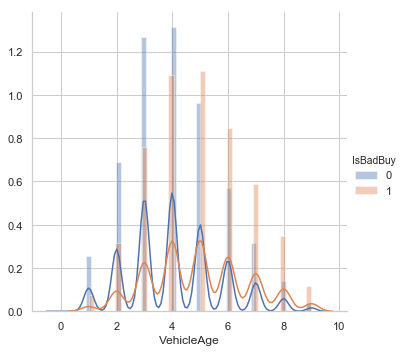

[2.74036419e-05 4.23934341e-02 1.16218845e-01 2.17886357e-01
 2.33109080e-01 1.77520793e-01 1.09916008e-01 6.36586602e-02
 3.04180426e-02 8.85137635e-03]
[0.  0.9 1.8 2.7 3.6 4.5 5.4 6.3 7.2 8.1 9. ]


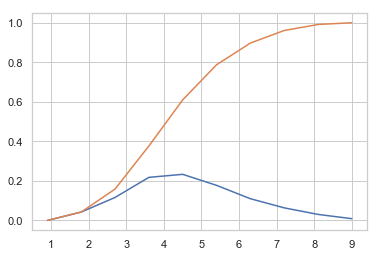

In [683]:
plt.figure(1)
#PDF of VehicleAge
#plt.subplot(1,2,1)
sns.FacetGrid(project_data, hue="IsBadBuy", size=5).map(sns.distplot, "VehicleAge").add_legend();
plt.show();

#plt.subplot(1,2,2)

plt.figure(2)
#------Plot CDF of age

counts, bin_edges = np.histogram(project_data['VehicleAge'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#plt.show();

90% of the vahicle have age less than 7 year from manufacture year.

<Figure size 432x288 with 0 Axes>

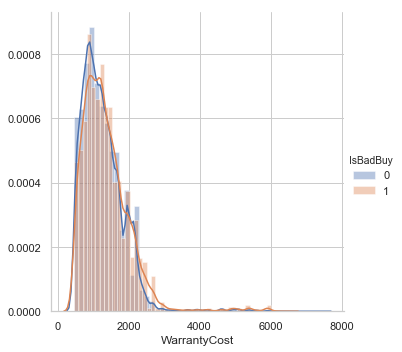

[5.00061658e-01 3.49506049e-01 1.33030980e-01 8.93358727e-03
 2.08267679e-03 2.39781867e-03 1.95936040e-03 1.87714947e-03
 9.59127468e-05 5.48072839e-05]
[ 462.  1165.6 1869.2 2572.8 3276.4 3980.  4683.6 5387.2 6090.8 6794.4
 7498. ]


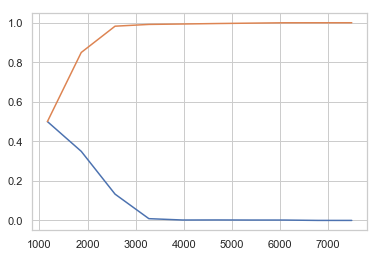

In [684]:
plt.figure(1)
#PDF of WarrantyCost
#plt.subplot(211)
sns.FacetGrid(project_data, hue="IsBadBuy", size=5).map(sns.distplot, "WarrantyCost").add_legend();
plt.show();

plt.figure(2)
#------Plot CDF of age

counts, bin_edges = np.histogram(project_data['WarrantyCost'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

80% of buyer choice have less than 2000 WarrantyCost 

<Figure size 432x288 with 0 Axes>

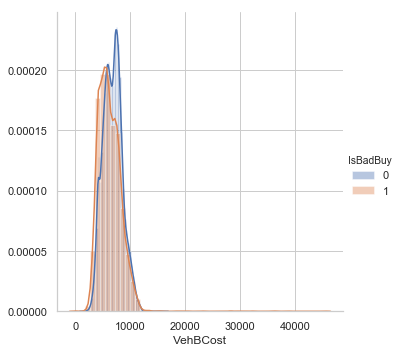

[1.14218380e-01 7.94267158e-01 9.12678295e-02 6.85091049e-05
 5.48072839e-05 1.37018210e-05 4.11054629e-05 2.74036419e-05
 2.74036419e-05 1.37018210e-05]
[1.00000e+00 4.54780e+03 9.09460e+03 1.36414e+04 1.81882e+04 2.27350e+04
 2.72818e+04 3.18286e+04 3.63754e+04 4.09222e+04 4.54690e+04]


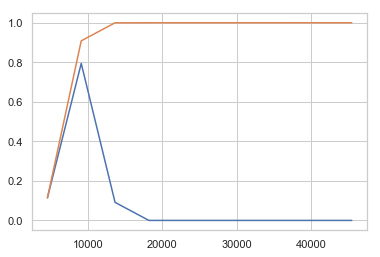

In [685]:
plt.figure(1)
#PDF of VehBCost
#plt.subplot(211)
sns.FacetGrid(project_data, hue="IsBadBuy", size=5).map(sns.distplot, "VehBCost").add_legend();
plt.show();

plt.figure(2)
#------Plot CDF of age

counts, bin_edges = np.histogram(project_data['VehBCost'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

Again 90% of buyerchoice have less than 10000 VehBCost

In [686]:
#Mean 
print("Means:")
print(np.mean(IsBadBuy_yes["VehicleAge"]))
print(np.mean(IsBadBuy_yes["WarrantyCost"]))
print(np.mean(IsBadBuy_yes["VehBCost"]))
print("*"*50)
print(np.mean(IsBadBuy_no["VehicleAge"]))
print(np.mean(IsBadBuy_no["WarrantyCost"]))
print(np.mean(IsBadBuy_no["VehBCost"]))

Means:
4.940953654188949
1360.246546345811
6259.274156639928
**************************************************
4.069461152686425
1264.848172856094
6797.077430593529


In [687]:
#Variance, Std-deviation
print("Means:")
print(np.std(IsBadBuy_yes["VehicleAge"]))
print(np.std(IsBadBuy_yes["WarrantyCost"]))
print(np.std(IsBadBuy_yes["VehBCost"]))
print("*"*50)
print(np.std(IsBadBuy_no["VehicleAge"]))
print(np.std(IsBadBuy_no["WarrantyCost"]))
print(np.std(IsBadBuy_no["VehBCost"]))

Means:
1.7652034214401928
679.8566695004682
2078.839471386023
**************************************************
1.6770113350557971
585.6329973638996
1709.3561755837766


##### Observation:

Mean of Vehicleage, vehiclecost and worrentycost are nearly same in both case of Buyer choice(yes,no).
    
Spreadness of VehicleAge is nearly same in both case of choice but spreadness of WarrantyCost and VehBCost is wide when buyer buy the car as compare of Buyer dont buy the vehicle. means some buyer are very negotiable and some are straight buy the vehicle.
    
All above three variable are not able to classified or segrigate the Buyer choice but they have good overlap which is good for model.

#### SubModel,Color,Size,WheelType,IsOnlineSale

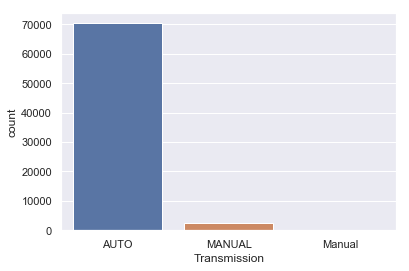

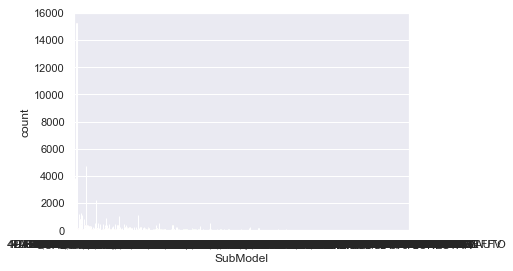

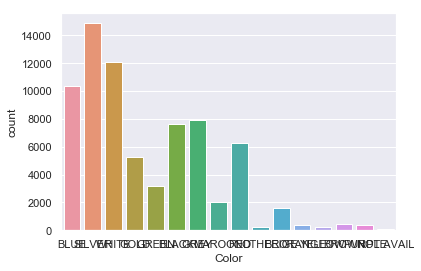

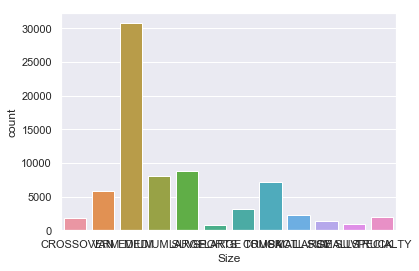

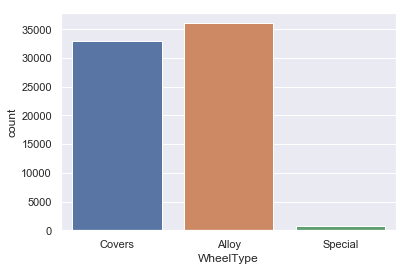

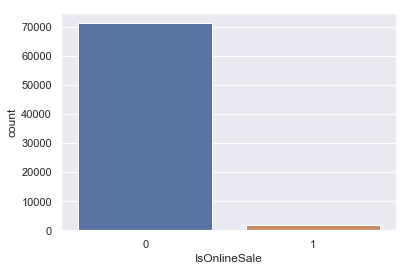

In [688]:
plt.figure(1)
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Transmission", data=project_data)

plt.figure(2)
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="SubModel", data=project_data)

plt.figure(3)
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Color", data=project_data)

plt.figure(4)
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Size", data=project_data)

plt.figure(5)
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="WheelType", data=project_data)

plt.figure(6)
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="IsOnlineSale", data=project_data)

Observation:  

Most of Transmission done auto.

Most of sale happen offline because of its second hand product.

People prefer to take vehicle with alloywheel tyre vehicle

Silver and white color vehicle prefered.

Medium size vehicle prefered

#### Multivariate analysis

In [689]:
project_data.columns

Index(['RefId', 'IsBadBuy', 'Date', 'Auction', 'VehYear', 'VehicleAge', 'Make',
       'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [690]:
df1 = project_data.iloc[:, 17:25]
df2 = project_data.iloc[:, 1:2]

In [691]:
df2.columns

Index(['IsBadBuy'], dtype='object')

In [692]:
df = pd.concat([df1, df2])


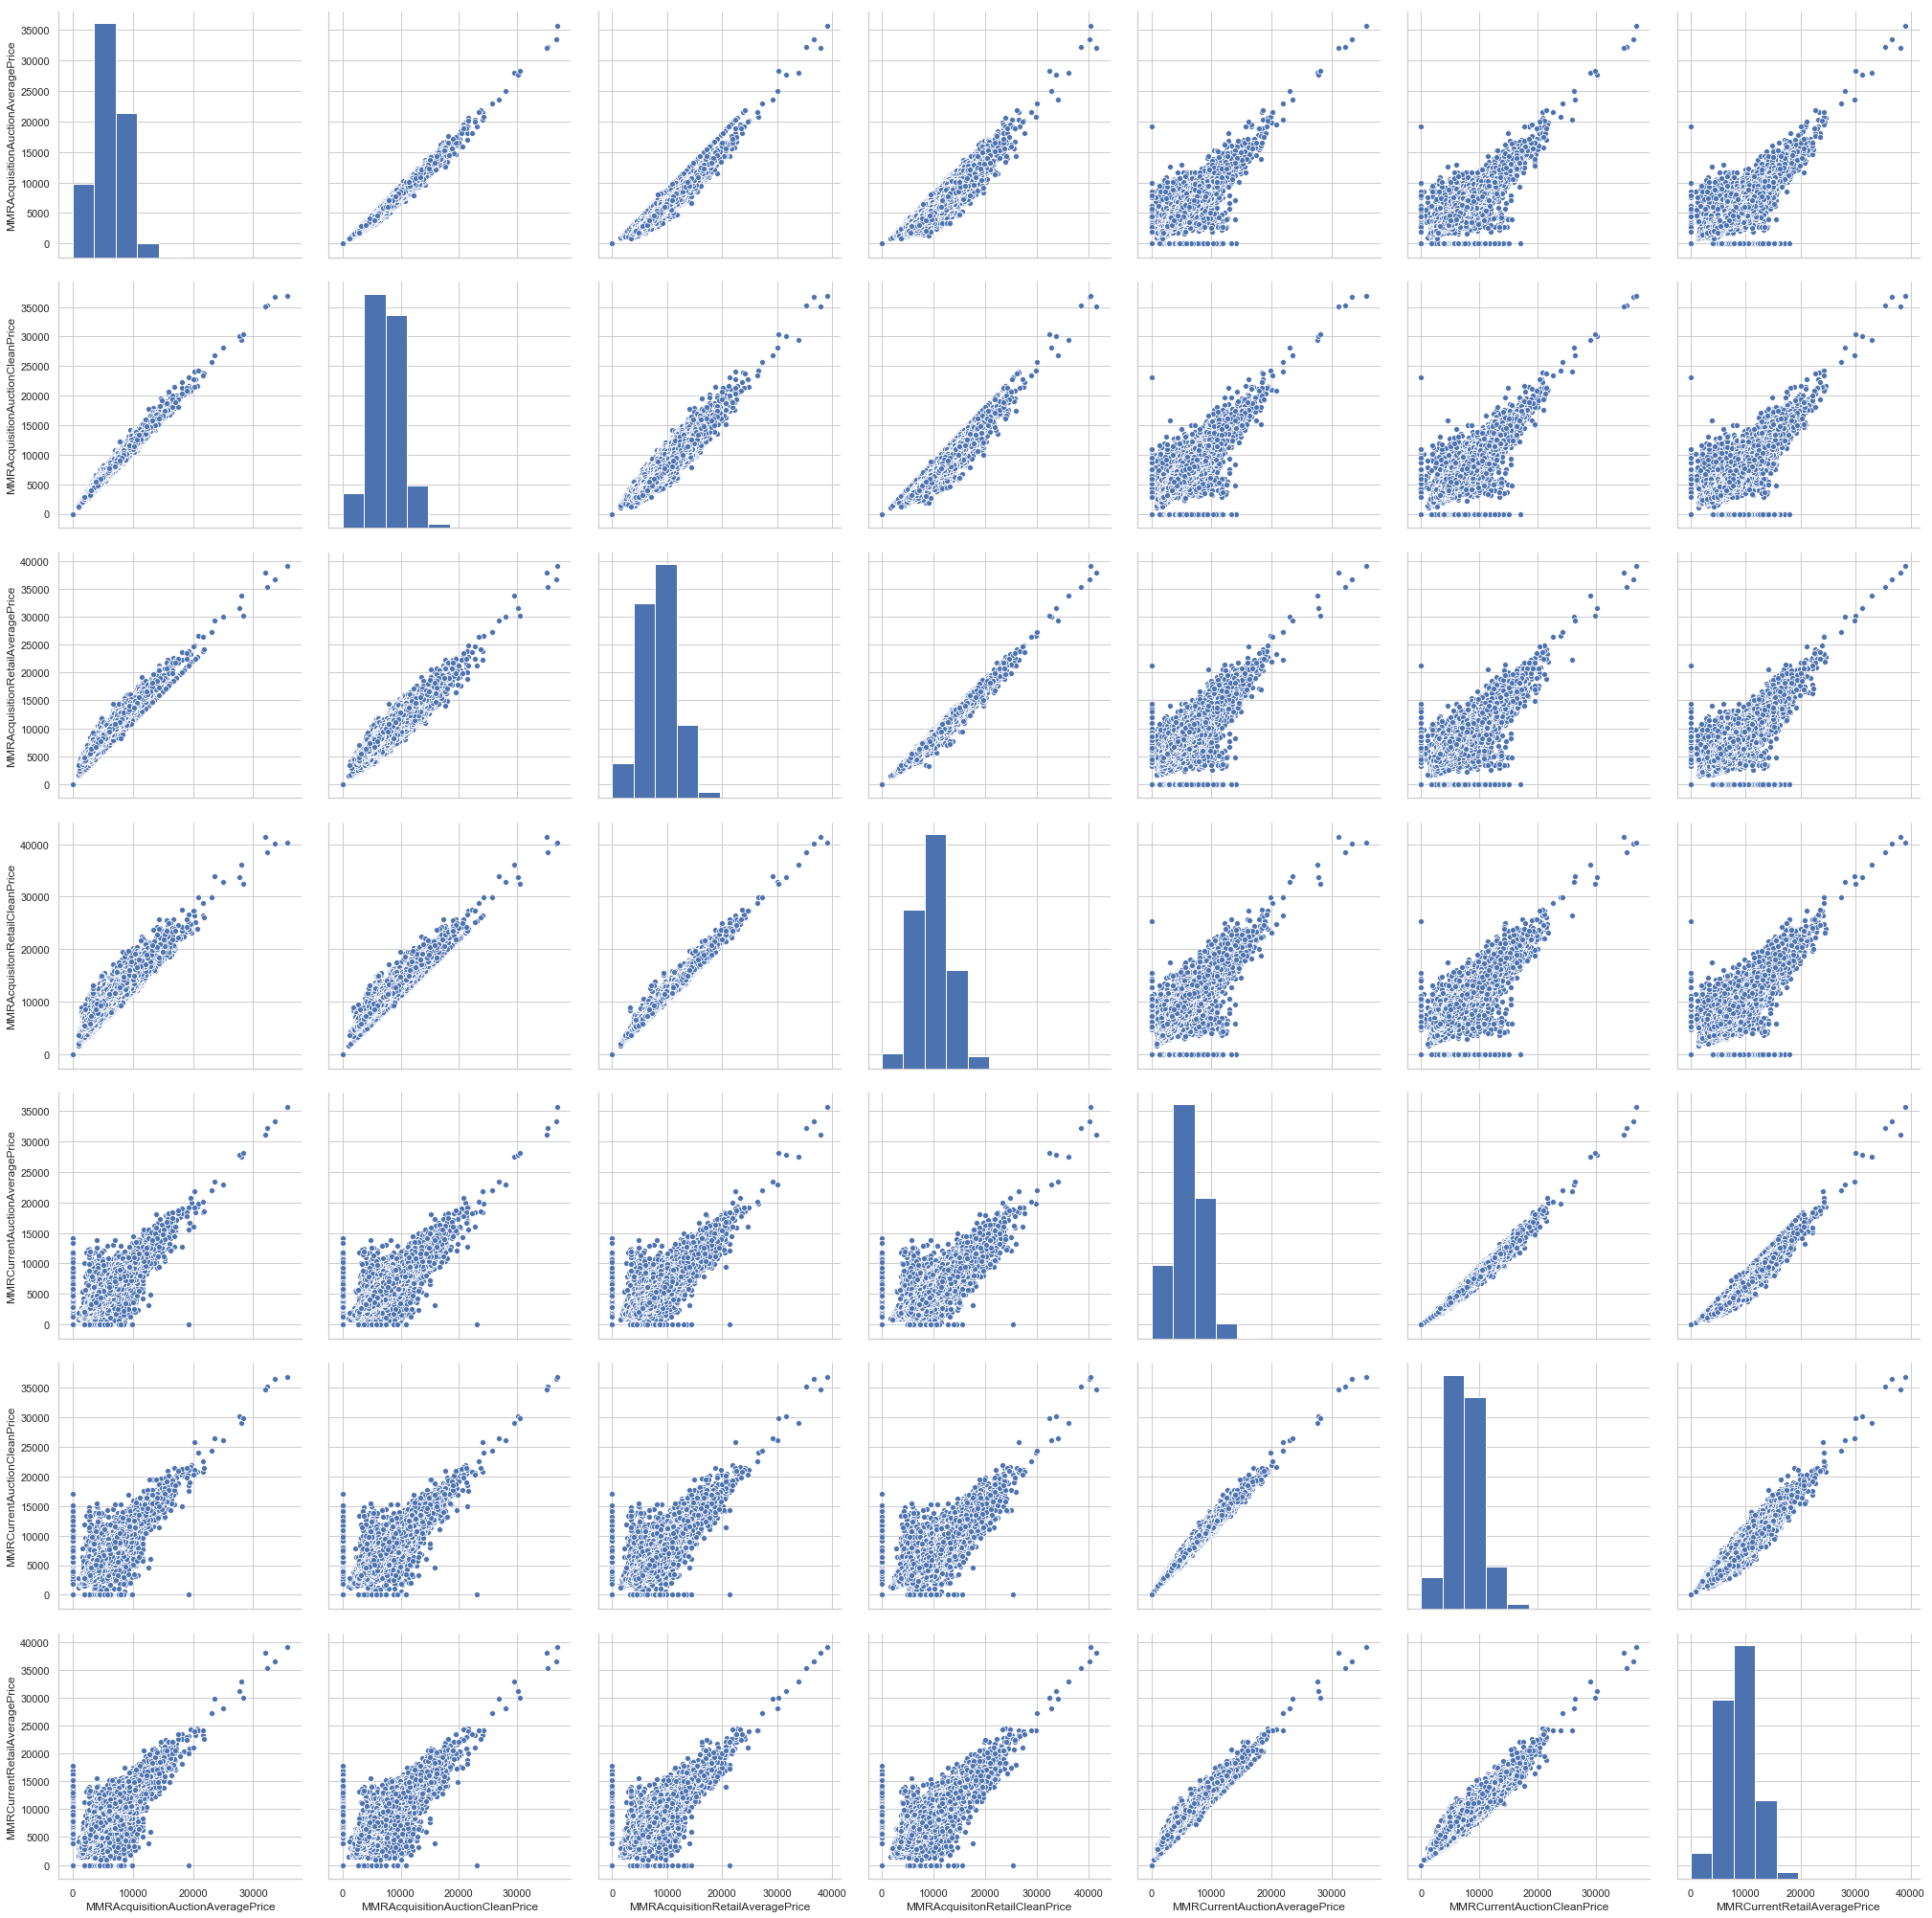

In [693]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df1, size=4);
plt.show()

Most of numerical Cost variable have linear variation among them

There is high chance of buyer did not buy vehicles

## Processing Missing value

In [694]:
project_data.head(5)

RefId  IsBadBuy       Date  Auction  VehYear  VehicleAge       Make  \
0  32389         0 2009-01-05  MANHEIM     2007           2   CHRYSLER   
1  32406         0 2009-01-05  MANHEIM     2005           4       FORD   
2  32407         0 2009-01-05  MANHEIM     2004           5      DODGE   
3  32408         0 2009-01-05  MANHEIM     2006           3  CHEVROLET   
4  32409         0 2009-01-05  MANHEIM     2004           5       FORD   

                  Model Trim               SubModel  ...  \
0  PACIFICA FWD 3.8L V6  Bas               4D SPORT  ...   
1  FREESTAR FWD V6 3.9L  SES  4D PASSENGER 3.9L SES  ...   
2  STRATUS 4C 2.4L I4 M   SE            4D SEDAN SE  ...   
3   TRAILBLAZER EXT 4WD   LS            4D SUV 4.2L  ...   
4    TAURUS 3.0L V6 EFI  SES   4D SEDAN SES DURATEC  ...   

  MMRCurrentRetailAveragePrice MMRCurrentRetailCleanPrice  PRIMEUNIT AUCGUART  \
0                       9906.0                    11657.0        NaN      NaN   
1                       5801.0                     6949.0        NaN      NaN   
2                       4169.0                     5114.0        NaN      NaN   
3                      10438.0                    12158.0        NaN      NaN   
4                       4139.0                     5351.0        NaN      NaN   

   BYRNO VNZIP1 VNST VehBCost  IsOnlineSale  WarrantyCost  
0   3453  80022   CO   6770.0             0          1389  
1  22916  80022   CO   6160.0             0           941  
2   3453  80022   CO   4250.0             0          1155  
3  22916  80022   CO   8180.0             0          1703  
4  22916  80022   CO   4900.0             0           825  

[5 rows x 34 columns]

In [695]:
project_data.columns[project_data.isnull().any()]

Index(['Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART'],
      dtype='object')

In [696]:
# variable having missing value
null_counts = project_data.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

AUCGUART                             69564
PRIMEUNIT                            69564
WheelType                             3174
WheelTypeID                           3169
Trim                                  2360
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentRetailAveragePrice           315
MMRCurrentRetailCleanPrice             315
MMRAcquisitonRetailCleanPrice           18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionAuctionAveragePrice       18
Transmission                             9
Color                                    8
SubModel                                 8
TopThreeAmericanName                     5
Size                                     5
Nationality                              5
dtype: int64

In [697]:
# variable having missing value
null_counts = project_data_test.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

AUCGUART                             46191
PRIMEUNIT                            46191
WheelTypeID                           2188
WheelType                             2188
Trim                                  1550
MMRCurrentAuctionAveragePrice          143
MMRCurrentAuctionCleanPrice            143
MMRCurrentRetailAveragePrice           143
MMRCurrentRetailCleanPrice             143
MMRAcquisitonRetailCleanPrice           10
MMRAcquisitionRetailAveragePrice        10
MMRAcquisitionAuctionCleanPrice         10
MMRAcquisitionAuctionAveragePrice       10
TopThreeAmericanName                     7
Size                                     7
Nationality                              7
SubModel                                 5
Color                                    4
Transmission                             3
dtype: int64

#### Preprocessing PRIMEUNIT and AUCGUART variable

In [698]:
project_data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
Date                                 72983 non-null datetime64[ns]
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Na

In [699]:
print(project_data["PRIMEUNIT"].value_counts(normalize = True))
print("*"*50)

print(project_data["AUCGUART"].value_counts(normalize = True))
print("*"*50)

NO     0.981866
YES    0.018134
Name: PRIMEUNIT, dtype: float64
**************************************************
GREEN    0.976894
RED      0.023106
Name: AUCGUART, dtype: float64
**************************************************


From above analysis, PRIMEUNIT and AUCGUART variable bith have very number of missing value and among present value they are highly imbalance so it will be better to remove both variable otherwise will create bias problem.

#### Notes:

    Some of variable are not useful for model, like RefId,Date, VehYear,W,heelTypeID
    
    VehYear already considered in VehicleAge variable
    
    Data is sorted so PurchDate variable not usefulll.

#### Multiple Imputation using MICE (Multiple Imputation by Chained Equations)

Rest of missing value in both categorical as well as numerical variable filled with the MICE method.

https://pypi.org/project/fancyimpute/

https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

Multiple imputation is a process where the missing values are filled multiple times to create “complete” datasets. Multiple imputation has a lot of advantages over traditional single imputation methods. Multiple Imputation by Chained Equations (MICE) is an imputation method that works with the assumption that the missing data are Missing at Random (MAR). Recall that for MAR, the nature of the missing data is related to the observed data but not the missing data. The MICE algorithm works by running multiple regression models and each missing value is modeled conditionally depending on the observed (non-missing) values. A complete explanation of the MICE algorithm can be seen here. fancyimpute.MICE().complete(data matrix) can be used for MICE implementation.

Usages:
    
    from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler

X is the complete data matrix

X_incomplete has the same values as X except a subset have been replace with NaN

Use 3 nearest rows which have a feature to fill in each row's missing features

X_filled_knn = KNN(k=3).fit_transform(X_incomplete)

matrix completion using convex optimization to find low-rank solution

that still matches observed values. Slow!

X_filled_nnm = NuclearNormMinimization().fit_transform(X_incomplete)

Instead of solving the nuclear norm objective directly, instead

induce sparsity using singular value thresholding

X_incomplete_normalized = BiScaler().fit_transform(X_incomplete)

X_filled_softimpute = SoftImpute().fit_transform(X_incomplete_normalized)

print mean squared error for the  imputation methods above

nnm_mse = ((X_filled_nnm[missing_mask] - X[missing_mask]) ** 2).mean()

print("Nuclear norm minimization MSE: %f" % nnm_mse)

softImpute_mse = ((X_filled_softimpute[missing_mask] - X[missing_mask]) ** 2).mean()

print("SoftImpute MSE: %f" % softImpute_mse)

knn_mse = ((X_filled_knn[missing_mask] - X[missing_mask]) ** 2).mean()

print("knnImpute MSE: %f" % knn_mse)

In [ ]:
project_data.to_csv("project_data_missing.csv", index=False)
project_data_test.to_csv("project_data_test_missing.csv", index=False)

#### The missing value filled using Microsoft AZURE Machine Learning studio platform

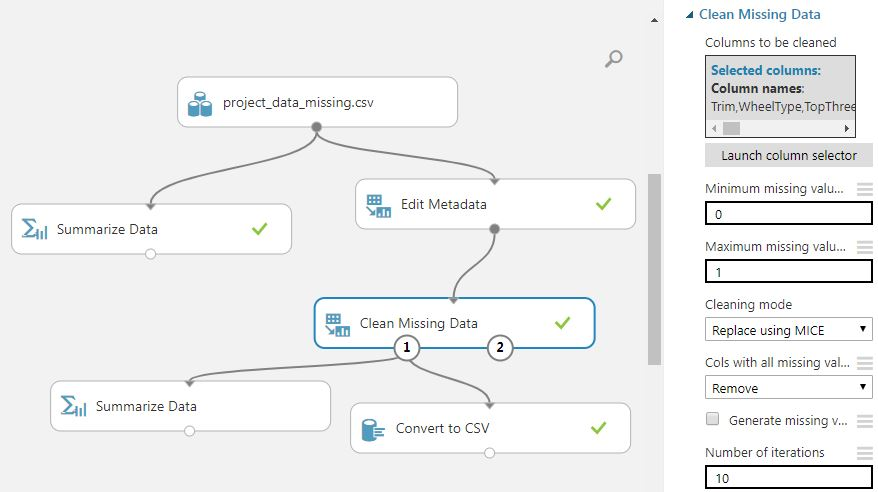

In [700]:
# for training dataset
#https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o
from IPython.display import Image
Image("missing_train_azure.jpg")
#Number of iterations=10

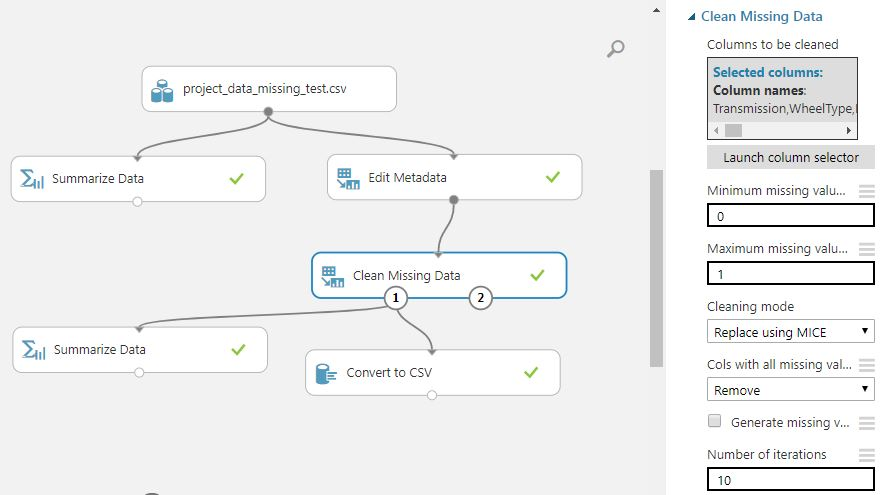

In [701]:
# for test dataset
#https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o
from IPython.display import Image
Image("missing_test_azure.jpg")
#Number of iterations=10

### Some basic preprocessing(Replacing space with underscore to consider as one value)

#### Importing dataset after filling Missing value in Azure ML Studio

In [702]:
project_data = pd.read_csv('project_data_clean_missing.csv')
project_data_test = pd.read_csv('project_data_test_clean_missing.csv')

##### Preprocessing Model column

In [703]:
project_data["Model"][0:5]

0    PACIFICA FWD 3.8L V6
1    FREESTAR FWD V6 3.9L
2    STRATUS 4C 2.4L I4 M
3     TRAILBLAZER EXT 4WD
4      TAURUS 3.0L V6 EFI
Name: Model, dtype: object

In [704]:
project_data["Model"].unique()

array(['PACIFICA FWD 3.8L V6', 'FREESTAR FWD V6 3.9L',
       'STRATUS 4C 2.4L I4 M', ..., 'LHS', 'ARMADA 4WD V8', 'S60'],
      dtype=object)

Since model is unique value, it will be useful to replace space with underscore

In [705]:
Model = []
for i in range(len(project_data)):
    a = project_data["Model"][i].replace(" ", "_")
    Model.append(a)

In [706]:
Model[0:5]

['PACIFICA_FWD_3.8L_V6',
 'FREESTAR_FWD_V6_3.9L',
 'STRATUS_4C_2.4L_I4_M',
 'TRAILBLAZER_EXT_4WD',
 'TAURUS_3.0L_V6_EFI']

In [707]:
project_data.drop(['Model'], axis=1, inplace=True)
project_data["Model"] = Model

In [708]:
project_data["Model"].unique()

array(['PACIFICA_FWD_3.8L_V6', 'FREESTAR_FWD_V6_3.9L',
       'STRATUS_4C_2.4L_I4_M', ..., 'LHS', 'ARMADA_4WD_V8', 'S60'],
      dtype=object)

In [709]:
#test
Model = []
for i in range(len(project_data_test)):
    a = project_data_test["Model"][i].replace(" ", "_")
    Model.append(a)

In [710]:
project_data_test.drop(['Model'], axis=1, inplace=True)
project_data_test["Model"] = Model

#### Preprocessing SubModel column

In [711]:
type(project_data["SubModel"])

pandas.core.series.Series

In [712]:
project_data["SubModel"][0:5]

0                 4D SPORT
1    4D PASSENGER 3.9L SES
2              4D SEDAN SE
3              4D SUV 4.2L
4     4D SEDAN SES DURATEC
Name: SubModel, dtype: object

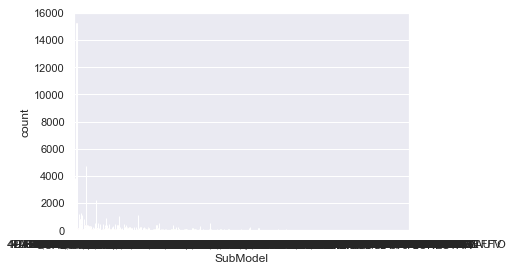

In [713]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="SubModel", data=project_data)

In [714]:
project_data['SubModel'] = project_data['SubModel'].astype(str).str.replace(" ", "_")
project_data["SubModel"][0:5]

0                 4D_SPORT
1    4D_PASSENGER_3.9L_SES
2              4D_SEDAN_SE
3              4D_SUV_4.2L
4     4D_SEDAN_SES_DURATEC
Name: SubModel, dtype: object

In [715]:
project_data_test['SubModel'] = project_data_test['SubModel'].astype(str).str.replace(" ", "_")
project_data_test["SubModel"][0:5]

0            4D_SEDAN
1            4D_SEDAN
2            4D_SEDAN
3            4D_SEDAN
4    4D_SEDAN_CLASSIC
Name: SubModel, dtype: object

#### Preprocessing Size column

In [716]:
project_data["Size"].value_counts()

MEDIUM         30786
LARGE           8850
MEDIUM SUV      8091
COMPACT         7205
VAN             5854
LARGE TRUCK     3170
SMALL SUV       2278
SPECIALTY       1915
CROSSOVER       1759
LARGE SUV       1433
SMALL TRUCK      865
SPORTS           777
Name: Size, dtype: int64

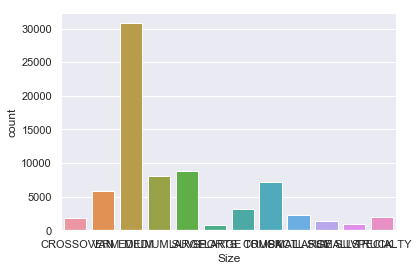

In [717]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Size", data=project_data)

In [718]:
#filling missing value with mode value in train data
#project_data['Size'].fillna(project_data['Size'].mode()[0], inplace=True)

In [719]:
project_data['Size'] = project_data['Size'].astype(str).str.replace(" ", "_")
project_data["Size"].value_counts()

MEDIUM         30786
LARGE           8850
MEDIUM_SUV      8091
COMPACT         7205
VAN             5854
LARGE_TRUCK     3170
SMALL_SUV       2278
SPECIALTY       1915
CROSSOVER       1759
LARGE_SUV       1433
SMALL_TRUCK      865
SPORTS           777
Name: Size, dtype: int64

In [720]:
project_data["Size"].unique()

array(['CROSSOVER', 'VAN', 'MEDIUM', 'MEDIUM_SUV', 'LARGE', 'SPORTS',
       'LARGE_TRUCK', 'COMPACT', 'SMALL_SUV', 'LARGE_SUV', 'SMALL_TRUCK',
       'SPECIALTY'], dtype=object)

In [721]:
project_data_test['Size'] = project_data_test['Size'].astype(str).str.replace(" ", "_")
project_data_test["Size"].value_counts()

MEDIUM         20365
LARGE           5711
MEDIUM_SUV      5455
COMPACT         4882
VAN             4042
LARGE_TRUCK     2069
SMALL_SUV       1575
SPECIALTY       1446
CROSSOVER       1286
LARGE_SUV        868
SPORTS           516
SMALL_TRUCK      492
Name: Size, dtype: int64

#### Preprocessing Nationality column

In [722]:
project_data["Nationality"].value_counts()

AMERICAN          61033
OTHER ASIAN        8033
TOP LINE ASIAN     3722
OTHER               195
Name: Nationality, dtype: int64

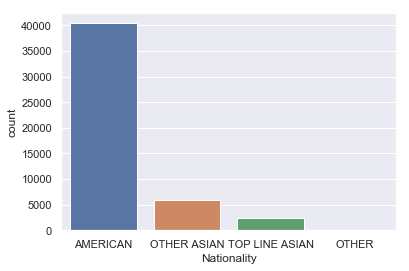

In [723]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Nationality", data=project_data_test)

In [724]:
#filling missing value with mode value in train
#project_data['Nationality'].fillna(project_data['Nationality'].mode()[0], inplace=True)

In [725]:
project_data['Nationality'] = project_data['Nationality'].astype(str).str.replace(" ", "_")
project_data["Nationality"].value_counts()

AMERICAN          61033
OTHER_ASIAN        8033
TOP_LINE_ASIAN     3722
OTHER               195
Name: Nationality, dtype: int64

In [726]:
project_data_test['Nationality'] = project_data_test['Nationality'].astype(str).str.replace(" ", "_")
project_data_test["Nationality"].value_counts()

AMERICAN          40420
OTHER_ASIAN        5838
TOP_LINE_ASIAN     2326
OTHER               123
Name: Nationality, dtype: int64

#### Preprocessing Color column

In [727]:
project_data["Color"].value_counts()

SILVER       14877
WHITE        12125
BLUE         10349
GREY          7888
BLACK         7627
RED           6258
GOLD          5231
GREEN         3194
MAROON        2046
BEIGE         1584
BROWN          436
ORANGE         415
PURPLE         373
YELLOW         244
OTHER          242
NOT AVAIL       94
Name: Color, dtype: int64

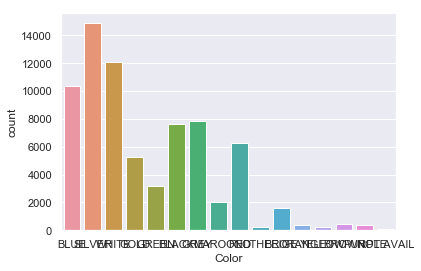

In [728]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Color", data=project_data)

In [729]:
project_data['Color'] = project_data['Color'].astype(str).str.replace(" ", "_")
project_data["Color"].value_counts()

SILVER       14877
WHITE        12125
BLUE         10349
GREY          7888
BLACK         7627
RED           6258
GOLD          5231
GREEN         3194
MAROON        2046
BEIGE         1584
BROWN          436
ORANGE         415
PURPLE         373
YELLOW         244
OTHER          242
NOT_AVAIL       94
Name: Color, dtype: int64

In [730]:
project_data_test['Color'] = project_data_test['Color'].astype(str).str.replace(" ", "_")
project_data_test["Color"].value_counts()

SILVER       10084
WHITE         8056
BLUE          6840
BLACK         5177
GREY          5077
RED           4166
GOLD          3401
GREEN         2318
MAROON        1308
BEIGE         1070
PURPLE         295
BROWN          278
ORANGE         238
YELLOW         181
OTHER          128
NOT_AVAIL       89
PINK             1
Name: Color, dtype: int64

#### Preprocessing Make column

In [731]:
project_data["Make"].value_counts()

CHEVROLET       17248
DODGE           12912
FORD            11305
CHRYSLER         8844
PONTIAC          4258
KIA              2484
SATURN           2163
NISSAN           2085
HYUNDAI          1811
JEEP             1644
SUZUKI           1328
TOYOTA           1144
MITSUBISHI       1030
MAZDA             979
MERCURY           913
BUICK             720
GMC               649
HONDA             497
OLDSMOBILE        243
ISUZU             134
VOLKSWAGEN        134
SCION             129
LINCOLN            97
INFINITI           42
VOLVO              37
ACURA              33
CADILLAC           33
LEXUS              31
SUBARU             28
MINI               24
PLYMOUTH            2
TOYOTA SCION        1
HUMMER              1
Name: Make, dtype: int64

In [732]:
project_data['Make'] = project_data['Make'].astype(str).str.replace(" ", "_")
project_data["Make"].value_counts()

CHEVROLET       17248
DODGE           12912
FORD            11305
CHRYSLER         8844
PONTIAC          4258
KIA              2484
SATURN           2163
NISSAN           2085
HYUNDAI          1811
JEEP             1644
SUZUKI           1328
TOYOTA           1144
MITSUBISHI       1030
MAZDA             979
MERCURY           913
BUICK             720
GMC               649
HONDA             497
OLDSMOBILE        243
ISUZU             134
VOLKSWAGEN        134
SCION             129
LINCOLN            97
INFINITI           42
VOLVO              37
ACURA              33
CADILLAC           33
LEXUS              31
SUBARU             28
MINI               24
PLYMOUTH            2
TOYOTA_SCION        1
HUMMER              1
Name: Make, dtype: int64

In [733]:
project_data_test['Make'] = project_data_test['Make'].astype(str).str.replace(" ", "_")
project_data_test["Make"].value_counts()

CHEVROLET     11486
DODGE          8095
FORD           7441
CHRYSLER       6050
PONTIAC        3001
KIA            1914
SATURN         1392
HYUNDAI        1311
NISSAN         1228
JEEP           1187
SUZUKI          873
MITSUBISHI      783
TOYOTA          780
MAZDA           704
MERCURY         620
BUICK           500
GMC             388
HONDA           318
OLDSMOBILE      163
ISUZU            85
SCION            85
VOLKSWAGEN       71
LINCOLN          66
VOLVO            42
CADILLAC         29
INFINITI         28
ACURA            26
LEXUS            19
SUBARU           12
MINI             10
Name: Make, dtype: int64

In [734]:
project_data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
Date                                 72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Trim                                 72983 non-null object
SubModel                             72983 non-null object
Color                                72983 non-null object
Transmission                         72983 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            72983 non-null object
VehOdo                               72983 non-null int64
Nationality                          72983 non-null object
Size      

## Processing Missing data

In [735]:
# variable having missing value
null_counts = project_data.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

AUCGUART       69564
PRIMEUNIT      69564
WheelTypeID     3169
dtype: int64

In [736]:
# variable having missing value
null_counts = project_data_test.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

AUCGUART       46191
PRIMEUNIT      46191
WheelTypeID     2188
dtype: int64

## Split dataset into test train and cv

In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from collections import Counter
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [499]:
project_data.head(10)


RefId  IsBadBuy                  Date  Auction  VehYear  VehicleAge  \
0  32389         0  1/5/2009 12:00:00 AM  MANHEIM     2007           2   
1  32406         0  1/5/2009 12:00:00 AM  MANHEIM     2005           4   
2  32407         0  1/5/2009 12:00:00 AM  MANHEIM     2004           5   
3  32408         0  1/5/2009 12:00:00 AM  MANHEIM     2006           3   
4  32409         0  1/5/2009 12:00:00 AM  MANHEIM     2004           5   
5   8884         0  1/5/2009 12:00:00 AM  MANHEIM     2005           4   
6   8883         0  1/5/2009 12:00:00 AM  MANHEIM     2003           6   
7   8882         0  1/5/2009 12:00:00 AM  MANHEIM     2004           5   
8   8881         0  1/5/2009 12:00:00 AM  MANHEIM     2004           5   
9   8880         1  1/5/2009 12:00:00 AM  MANHEIM     2006           3   

        Make Trim               SubModel   Color  ...  \
0   CHRYSLER  Bas               4D_SPORT    BLUE  ...   
1       FORD  SES  4D_PASSENGER_3.9L_SES  SILVER  ...   
2      DODGE   SE            4D_SEDAN_SE  SILVER  ...   
3  CHEVROLET   LS            4D_SUV_4.2L   WHITE  ...   
4       FORD  SES   4D_SEDAN_SES_DURATEC    GOLD  ...   
5  CHEVROLET  Bas               4D_SEDAN    GOLD  ...   
6       FORD  Bas               2D_COUPE  SILVER  ...   
7      DODGE  SXT            4D_SEDAN_SE    GOLD  ...   
8      DODGE  SLT            4D_SUV_4.7L  SILVER  ...   
9       FORD   SE         4D_CUV_3.0L_SE   GREEN  ...   

  MMRCurrentRetailCleanPrice  PRIMEUNIT AUCGUART  BYRNO VNZIP1 VNST VehBCost  \
0                    11657.0        NaN      NaN   3453  80022   CO   6770.0   
1                     6949.0        NaN      NaN  22916  80022   CO   6160.0   
2                     5114.0        NaN      NaN   3453  80022   CO   4250.0   
3                    12158.0        NaN      NaN  22916  80022   CO   8180.0   
4                     5351.0        NaN      NaN  22916  80022   CO   4900.0   
5                     6826.0        NaN      NaN  16044  27542   NC   5600.0   
6                     7061.0        NaN      NaN  16044  27542   NC   6400.0   
7                     5210.0        NaN      NaN  17675  27542   NC   4700.0   
8                    10718.0        NaN      NaN  16044  27542   NC   7600.0   
9                     9522.0        NaN      NaN  16044  27542   NC   6700.0   

   IsOnlineSale  WarrantyCost                 Model  
0             0          1389  PACIFICA_FWD_3.8L_V6  
1             0           941  FREESTAR_FWD_V6_3.9L  
2             0          1155  STRATUS_4C_2.4L_I4_M  
3             0          1703   TRAILBLAZER_EXT_4WD  
4             0           825    TAURUS_3.0L_V6_EFI  
5             0          2152    IMPALA_3.4L_V6_SFI  
6             0          1028  MUSTANG_V6_3.8L_V6_E  
7             0          1020  STRATUS_4C_2.4L_I4_M  
8             0          1411   DURANGO_4WD_V8_4.7L  
9             0          1623  FREESTYLE_AWD_V6_3.0  

[10 rows x 34 columns]

In [501]:
project_data["IsBadBuy"].value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

Dataset is highly imbalane so not possible to split on time base

In [502]:
y=project_data["IsBadBuy"]

In [503]:
x=project_data.drop(['IsBadBuy'], axis=1)

In [504]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=0.3)

In [505]:
x_test=project_data_test

In [506]:
x_train.head(5)


RefId                    Date  Auction  VehYear  VehicleAge       Make  \
70092  63302  11/30/2010 12:00:00 AM  MANHEIM     2005           5       FORD   
61749  12950   9/27/2010 12:00:00 AM  MANHEIM     2008           2  CHEVROLET   
67834   4486  11/10/2010 12:00:00 AM    OTHER     2003           7       FORD   
45665  65805   4/15/2010 12:00:00 AM  MANHEIM     2002           8       FORD   
44361  11399    4/2/2010 12:00:00 AM  MANHEIM     2006           4       FORD   

      Trim         SubModel   Color Transmission  ...  \
70092  XLT  4D_CUV_3.0L_XLT   WHITE         AUTO  ...   
61749   LS      4D_SEDAN_LS    BLUE         AUTO  ...   
67834   SE      4D_SEDAN_SE   WHITE         AUTO  ...   
45665   SE      4D_WAGON_SE     RED         AUTO  ...   
44361   SE      4D_SEDAN_SE  MAROON         AUTO  ...   

       MMRCurrentRetailCleanPrice PRIMEUNIT  AUCGUART  BYRNO VNZIP1 VNST  \
70092                     10433.0       NaN       NaN  52598  28625   NC   
61749                     14121.0       NaN       NaN  21973  27542   NC   
67834                      6761.0       NaN       NaN  52646  60445   IL   
45665                      5869.0       NaN       NaN  19619  33411   FL   
44361                     12953.0       NaN       NaN   1191  27542   NC   

       VehBCost  IsOnlineSale  WarrantyCost          Model  
70092    7310.0             0           983  ESCAPE_2WD_V6  
61749    9700.0             0          1038      MALIBU_4C  
67834    4195.0             0          1543          FOCUS  
45665    3715.0             0          1455          FOCUS  
44361    8300.0             1          1373      FUSION_V6  

[5 rows x 33 columns]

In [507]:
x_train["IsOnlineSale"].value_counts()

0    49783
1     1305
Name: IsOnlineSale, dtype: int64

In [508]:
y_train.head(10)

70092    0
61749    0
67834    1
45665    0
44361    0
4058     0
6334     0
51259    0
2394     0
61451    1
Name: IsBadBuy, dtype: int64

In [509]:
y_train.value_counts()

0    44805
1     6283
Name: IsBadBuy, dtype: int64

In [510]:
y_cv.value_counts()

0    19202
1     2693
Name: IsBadBuy, dtype: int64

Now ratio is almost  same in both case of 0 and 1

In [511]:
x_train.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51088 entries, 70092 to 25710
Data columns (total 33 columns):
RefId                                51088 non-null int64
Date                                 51088 non-null object
Auction                              51088 non-null object
VehYear                              51088 non-null int64
VehicleAge                           51088 non-null int64
Make                                 51088 non-null object
Trim                                 51088 non-null object
SubModel                             51088 non-null object
Color                                51088 non-null object
Transmission                         51088 non-null object
WheelTypeID                          48916 non-null float64
WheelType                            51088 non-null object
VehOdo                               51088 non-null int64
Nationality                          51088 non-null object
Size                                 51088 non-null object
TopTh

## Data preprocessing(one hot encoding) for categorical data

In [512]:
#you can vectorize the Auction
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
vectorizer.fit(x_train['Auction'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_Auction = vectorizer.transform(x_train['Auction'].values)
x_cv_Auction = vectorizer.transform(x_cv['Auction'].values)
x_test_Auction = vectorizer.transform(x_test['Auction'].values)

print("Shape of matrix after one hot encodig ",x_train_Auction.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_Auction.shape, y_cv.shape)
print("Shape of matrix after one hot encodig ",x_test_Auction.shape)

Shape of matrix after one hot encodig  (51088, 3) (51088,)
Shape of matrix after one hot encodig  (21895, 3) (21895,)
Shape of matrix after one hot encodig  (48707, 3)


In [513]:
#you can vectorize the Make
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
vectorizer.fit(x_train['Make'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_Make = vectorizer.transform(x_train['Make'].values)
x_cv_Make = vectorizer.transform(x_cv['Make'].values)
x_test_Make = vectorizer.transform(x_test['Make'].values)

print("Shape of matrix after one hot encodig ",x_train_Make.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_Make.shape, y_cv.shape)
print("Shape of matrix after one hot encodig ",x_test_Make.shape)

Shape of matrix after one hot encodig  (51088, 33) (51088,)
Shape of matrix after one hot encodig  (21895, 33) (21895,)
Shape of matrix after one hot encodig  (48707, 33)


In [514]:
#you can vectorize the Trim
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
vectorizer.fit(x_train['Trim'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_Trim = vectorizer.transform(x_train['Trim'].values)
x_cv_Trim = vectorizer.transform(x_cv['Trim'].values)
x_test_Trim = vectorizer.transform(x_test['Trim'].values)

print("Shape of matrix after one hot encodig ",x_train_Trim.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_Trim.shape, y_cv.shape)
print("Shape of matrix after one hot encodig ",x_test_Trim.shape)

Shape of matrix after one hot encodig  (51088, 117) (51088,)
Shape of matrix after one hot encodig  (21895, 117) (21895,)
Shape of matrix after one hot encodig  (48707, 117)


In [515]:
#you can vectorize the SubModel
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
vectorizer.fit(x_train['SubModel'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_SubModel = vectorizer.transform(x_train['SubModel'].values)
x_cv_SubModel = vectorizer.transform(x_cv['SubModel'].values)
x_test_SubModel = vectorizer.transform(x_test['SubModel'].values)

print("Shape of matrix after one hot encodig ",x_train_SubModel.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_SubModel.shape, y_cv.shape)
print("Shape of matrix after one hot encodig ",x_test_SubModel.shape)

Shape of matrix after one hot encodig  (51088, 629) (51088,)
Shape of matrix after one hot encodig  (21895, 629) (21895,)
Shape of matrix after one hot encodig  (48707, 629)


In [516]:
#you can vectorize the Color
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
vectorizer.fit(x_train['Color'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_Color = vectorizer.transform(x_train['Color'].values)
x_cv_Color = vectorizer.transform(x_cv['Color'].values)
x_test_Color = vectorizer.transform(x_test['Color'].values)

print("Shape of matrix after one hot encodig ",x_train_Color.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_Color.shape, y_cv.shape)
print("Shape of matrix after one hot encodig ",x_test_Color.shape)

Shape of matrix after one hot encodig  (51088, 16) (51088,)
Shape of matrix after one hot encodig  (21895, 16) (21895,)
Shape of matrix after one hot encodig  (48707, 16)


In [517]:
#you can vectorize the Transmission
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
vectorizer.fit(x_train['Transmission'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_Transmission = vectorizer.transform(x_train['Transmission'].values)
x_cv_Transmission = vectorizer.transform(x_cv['Transmission'].values)
x_test_Transmission = vectorizer.transform(x_test['Transmission'].values)

print("Shape of matrix after one hot encodig ",x_train_Transmission.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_Transmission.shape, y_cv.shape)
print("Shape of matrix after one hot encodig ",x_test_Transmission.shape)

Shape of matrix after one hot encodig  (51088, 2) (51088,)
Shape of matrix after one hot encodig  (21895, 2) (21895,)
Shape of matrix after one hot encodig  (48707, 2)


In [518]:
#you can vectorize the WheelType
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
vectorizer.fit(x_train['WheelType'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_WheelType = vectorizer.transform(x_train['WheelType'].values)
x_cv_WheelType = vectorizer.transform(x_cv['WheelType'].values)
x_test_WheelType = vectorizer.transform(x_test['WheelType'].values)

print("Shape of matrix after one hot encodig ",x_train_WheelType.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_WheelType.shape, y_cv.shape)
print("Shape of matrix after one hot encodig ",x_test_WheelType.shape)

Shape of matrix after one hot encodig  (51088, 3) (51088,)
Shape of matrix after one hot encodig  (21895, 3) (21895,)
Shape of matrix after one hot encodig  (48707, 3)


In [519]:
#you can vectorize the Nationality
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
vectorizer.fit(x_train['Nationality'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_Nationality = vectorizer.transform(x_train['Nationality'].values)
x_cv_Nationality = vectorizer.transform(x_cv['Nationality'].values)
x_test_Nationality = vectorizer.transform(x_test['Nationality'].values)

print("Shape of matrix after one hot encodig ",x_train_Nationality.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_Nationality.shape, y_cv.shape)
print("Shape of matrix after one hot encodig ",x_test_Nationality.shape)

Shape of matrix after one hot encodig  (51088, 4) (51088,)
Shape of matrix after one hot encodig  (21895, 4) (21895,)
Shape of matrix after one hot encodig  (48707, 4)


In [520]:
#you can vectorize the Size
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
vectorizer.fit(x_train['Size'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_Size = vectorizer.transform(x_train['Size'].values)
x_cv_Size = vectorizer.transform(x_cv['Size'].values)
x_test_Size = vectorizer.transform(x_test['Size'].values)

print("Shape of matrix after one hot encodig ",x_train_Size.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_Size.shape, y_cv.shape)
print("Shape of matrix after one hot encodig ",x_test_Size.shape)

Shape of matrix after one hot encodig  (51088, 12) (51088,)
Shape of matrix after one hot encodig  (21895, 12) (21895,)
Shape of matrix after one hot encodig  (48707, 12)


In [521]:
#you can vectorize the TopThreeAmericanName
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
vectorizer.fit(x_train['TopThreeAmericanName'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_TopThreeAmericanName = vectorizer.transform(x_train['TopThreeAmericanName'].values)
x_cv_TopThreeAmericanName = vectorizer.transform(x_cv['TopThreeAmericanName'].values)
x_test_TopThreeAmericanName = vectorizer.transform(x_test['TopThreeAmericanName'].values)

print("Shape of matrix after one hot encodig ",x_train_TopThreeAmericanName.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_TopThreeAmericanName.shape, y_cv.shape)
print("Shape of matrix after one hot encodig ",x_test_TopThreeAmericanName.shape)

Shape of matrix after one hot encodig  (51088, 4) (51088,)
Shape of matrix after one hot encodig  (21895, 4) (21895,)
Shape of matrix after one hot encodig  (48707, 4)


In [522]:
#you can vectorize the VNST
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
vectorizer.fit(x_train['VNST'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_VNST = vectorizer.transform(x_train['VNST'].values)
x_cv_VNST = vectorizer.transform(x_cv['VNST'].values)
x_test_VNST = vectorizer.transform(x_test['VNST'].values)

print("Shape of matrix after one hot encodig ",x_train_VNST.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_VNST.shape, y_cv.shape)
print("Shape of matrix after one hot encodig ",x_test_VNST.shape)

Shape of matrix after one hot encodig  (51088, 37) (51088,)
Shape of matrix after one hot encodig  (21895, 37) (21895,)
Shape of matrix after one hot encodig  (48707, 37)


In [523]:
#you can vectorize the Model
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
vectorizer.fit(x_train['Model'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_Model = vectorizer.transform(x_train['Model'].values)
x_cv_Model = vectorizer.transform(x_cv['Model'].values)
x_test_Model = vectorizer.transform(x_test['Model'].values)

print("Shape of matrix after one hot encodig ",x_train_Model.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_Model.shape, y_cv.shape)
print("Shape of matrix after one hot encodig ",x_test_Model.shape)

Shape of matrix after one hot encodig  (51088, 1030) (51088,)
Shape of matrix after one hot encodig  (21895, 1030) (21895,)
Shape of matrix after one hot encodig  (48707, 1030)


### Merge categorical dataset

In [525]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_categorical = hstack((x_train_Auction,x_train_Make,x_train_Trim,x_train_SubModel,x_train_Color,x_train_Transmission,x_train_WheelType,x_train_Nationality,x_train_Size,x_train_TopThreeAmericanName,x_train_VNST,x_train_Model))
x_cv_categorical = hstack((x_cv_Auction,x_cv_Make,x_cv_Trim,x_cv_SubModel,x_cv_Color,x_cv_Transmission,x_cv_WheelType,x_cv_Nationality,x_cv_Size,x_cv_TopThreeAmericanName,x_cv_VNST,x_cv_Model))
x_test_categorical = hstack((x_test_Auction,x_test_Make,x_test_Trim,x_test_SubModel,x_test_Color,x_test_Transmission,x_test_WheelType,x_test_Nationality,x_test_Size,x_test_TopThreeAmericanName,x_test_VNST,x_test_Model))

print(x_train_categorical.shape)
print(x_cv_categorical.shape)
print(x_test_categorical.shape)

(51088, 1890)
(21895, 1890)
(48707, 1890)


## Encoding numerical features(Normalize)

In [526]:
x_train.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51088 entries, 70092 to 25710
Data columns (total 33 columns):
RefId                                51088 non-null int64
Date                                 51088 non-null object
Auction                              51088 non-null object
VehYear                              51088 non-null int64
VehicleAge                           51088 non-null int64
Make                                 51088 non-null object
Trim                                 51088 non-null object
SubModel                             51088 non-null object
Color                                51088 non-null object
Transmission                         51088 non-null object
WheelTypeID                          48916 non-null float64
WheelType                            51088 non-null object
VehOdo                               51088 non-null int64
Nationality                          51088 non-null object
Size                                 51088 non-null object
TopTh

In [527]:
#vectorize the VehOdo
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['VehOdo'].values.reshape(-1,1))

x_train_VehOdo = normalizer.transform(x_train['VehOdo'].values.reshape(-1,1))
x_cv_VehOdo = normalizer.transform(x_cv['VehOdo'].values.reshape(-1,1))
x_test_VehOdo = normalizer.transform(x_test['VehOdo'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_VehOdo.shape, y_train.shape)
print(x_cv_VehOdo.shape, y_cv.shape)
print(x_test_VehOdo.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [528]:
#vectorize the VehicleAge
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['VehicleAge'].values.reshape(-1,1))

x_train_VehicleAge = normalizer.transform(x_train['VehicleAge'].values.reshape(-1,1))
x_cv_VehicleAge = normalizer.transform(x_cv['VehicleAge'].values.reshape(-1,1))
x_test_VehicleAge = normalizer.transform(x_test['VehicleAge'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_VehicleAge.shape, y_train.shape)
print(x_cv_VehicleAge.shape, y_cv.shape)
print(x_test_VehicleAge.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [529]:
#vectorize the MMRAcquisitionAuctionAveragePrice
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['MMRAcquisitionAuctionAveragePrice'].values.reshape(-1,1))

x_train_MMRAcquisitionAuctionAveragePrice = normalizer.transform(x_train['MMRAcquisitionAuctionAveragePrice'].values.reshape(-1,1))
x_cv_MMRAcquisitionAuctionAveragePrice = normalizer.transform(x_cv['MMRAcquisitionAuctionAveragePrice'].values.reshape(-1,1))
x_test_MMRAcquisitionAuctionAveragePrice = normalizer.transform(x_test['MMRAcquisitionAuctionAveragePrice'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_MMRAcquisitionAuctionAveragePrice.shape, y_train.shape)
print(x_cv_MMRAcquisitionAuctionAveragePrice.shape, y_cv.shape)
print(x_test_MMRAcquisitionAuctionAveragePrice.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [530]:
#vectorize the MMRAcquisitionAuctionCleanPrice
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['MMRAcquisitionAuctionCleanPrice'].values.reshape(-1,1))

x_train_MMRAcquisitionAuctionCleanPrice = normalizer.transform(x_train['MMRAcquisitionAuctionCleanPrice'].values.reshape(-1,1))
x_cv_MMRAcquisitionAuctionCleanPrice = normalizer.transform(x_cv['MMRAcquisitionAuctionCleanPrice'].values.reshape(-1,1))
x_test_MMRAcquisitionAuctionCleanPrice = normalizer.transform(x_test['MMRAcquisitionAuctionCleanPrice'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_MMRAcquisitionAuctionCleanPrice.shape, y_train.shape)
print(x_cv_MMRAcquisitionAuctionCleanPrice.shape, y_cv.shape)
print(x_test_MMRAcquisitionAuctionCleanPrice.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [531]:
#vectorize the MMRAcquisitionRetailAveragePrice
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['MMRAcquisitionRetailAveragePrice'].values.reshape(-1,1))

x_train_MMRAcquisitionRetailAveragePrice = normalizer.transform(x_train['MMRAcquisitionRetailAveragePrice'].values.reshape(-1,1))
x_cv_MMRAcquisitionRetailAveragePrice = normalizer.transform(x_cv['MMRAcquisitionRetailAveragePrice'].values.reshape(-1,1))
x_test_MMRAcquisitionRetailAveragePrice = normalizer.transform(x_test['MMRAcquisitionRetailAveragePrice'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_MMRAcquisitionRetailAveragePrice.shape, y_train.shape)
print(x_cv_MMRAcquisitionRetailAveragePrice.shape, y_cv.shape)
print(x_test_MMRAcquisitionRetailAveragePrice.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [532]:
#vectorize the MMRAcquisitonRetailCleanPrice
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['MMRAcquisitonRetailCleanPrice'].values.reshape(-1,1))

x_train_MMRAcquisitonRetailCleanPrice = normalizer.transform(x_train['MMRAcquisitonRetailCleanPrice'].values.reshape(-1,1))
x_cv_MMRAcquisitonRetailCleanPrice = normalizer.transform(x_cv['MMRAcquisitonRetailCleanPrice'].values.reshape(-1,1))
x_test_MMRAcquisitonRetailCleanPrice = normalizer.transform(x_test['MMRAcquisitonRetailCleanPrice'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_MMRAcquisitonRetailCleanPrice.shape, y_train.shape)
print(x_cv_MMRAcquisitonRetailCleanPrice.shape, y_cv.shape)
print(x_test_MMRAcquisitonRetailCleanPrice.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [533]:
#vectorize the MMRCurrentAuctionAveragePrice
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['MMRCurrentAuctionAveragePrice'].values.reshape(-1,1))

x_train_MMRCurrentAuctionAveragePrice = normalizer.transform(x_train['MMRCurrentAuctionAveragePrice'].values.reshape(-1,1))
x_cv_MMRCurrentAuctionAveragePrice = normalizer.transform(x_cv['MMRCurrentAuctionAveragePrice'].values.reshape(-1,1))
x_test_MMRCurrentAuctionAveragePrice = normalizer.transform(x_test['MMRCurrentAuctionAveragePrice'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_MMRCurrentAuctionAveragePrice.shape, y_train.shape)
print(x_cv_MMRCurrentAuctionAveragePrice.shape, y_cv.shape)
print(x_test_MMRCurrentAuctionAveragePrice.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [534]:
#vectorize the MMRCurrentAuctionCleanPrice
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['MMRCurrentAuctionCleanPrice'].values.reshape(-1,1))

x_train_MMRCurrentAuctionCleanPrice = normalizer.transform(x_train['MMRCurrentAuctionCleanPrice'].values.reshape(-1,1))
x_cv_MMRCurrentAuctionCleanPrice = normalizer.transform(x_cv['MMRCurrentAuctionCleanPrice'].values.reshape(-1,1))
x_test_MMRCurrentAuctionCleanPrice = normalizer.transform(x_test['MMRCurrentAuctionCleanPrice'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_MMRCurrentAuctionCleanPrice.shape, y_train.shape)
print(x_cv_MMRCurrentAuctionCleanPrice.shape, y_cv.shape)
print(x_test_MMRCurrentAuctionCleanPrice.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [535]:
#vectorize the MMRCurrentRetailAveragePrice
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['MMRCurrentRetailAveragePrice'].values.reshape(-1,1))

x_train_MMRCurrentRetailAveragePrice = normalizer.transform(x_train['MMRCurrentRetailAveragePrice'].values.reshape(-1,1))
x_cv_MMRCurrentRetailAveragePrice = normalizer.transform(x_cv['MMRCurrentRetailAveragePrice'].values.reshape(-1,1))
x_test_MMRCurrentRetailAveragePrice = normalizer.transform(x_test['MMRCurrentRetailAveragePrice'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_MMRCurrentRetailAveragePrice.shape, y_train.shape)
print(x_cv_MMRCurrentRetailAveragePrice.shape, y_cv.shape)
print(x_test_MMRCurrentRetailAveragePrice.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [536]:
#vectorize the MMRCurrentRetailCleanPrice
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['MMRCurrentRetailCleanPrice'].values.reshape(-1,1))

x_train_MMRCurrentRetailCleanPrice = normalizer.transform(x_train['MMRCurrentRetailCleanPrice'].values.reshape(-1,1))
x_cv_MMRCurrentRetailCleanPrice = normalizer.transform(x_cv['MMRCurrentRetailCleanPrice'].values.reshape(-1,1))
x_test_MMRCurrentRetailCleanPrice = normalizer.transform(x_test['MMRCurrentRetailCleanPrice'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_MMRCurrentRetailCleanPrice.shape, y_train.shape)
print(x_cv_MMRCurrentRetailCleanPrice.shape, y_cv.shape)
print(x_test_MMRCurrentRetailCleanPrice.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [537]:
#vectorize the BYRNO
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['BYRNO'].values.reshape(-1,1))

x_train_BYRNO = normalizer.transform(x_train['BYRNO'].values.reshape(-1,1))
x_cv_BYRNO = normalizer.transform(x_cv['BYRNO'].values.reshape(-1,1))
x_test_BYRNO = normalizer.transform(x_test['BYRNO'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_BYRNO.shape, y_train.shape)
print(x_cv_BYRNO.shape, y_cv.shape)
print(x_test_BYRNO.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [538]:
#vectorize the VNZIP1
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['VNZIP1'].values.reshape(-1,1))

x_train_VNZIP1 = normalizer.transform(x_train['VNZIP1'].values.reshape(-1,1))
x_cv_VNZIP1 = normalizer.transform(x_cv['VNZIP1'].values.reshape(-1,1))
x_test_VNZIP1 = normalizer.transform(x_test['VNZIP1'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_VNZIP1.shape, y_train.shape)
print(x_cv_VNZIP1.shape, y_cv.shape)
print(x_test_VNZIP1.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [539]:
#vectorize the VehBCost
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['VehBCost'].values.reshape(-1,1))

x_train_VehBCost = normalizer.transform(x_train['VehBCost'].values.reshape(-1,1))
x_cv_VehBCost = normalizer.transform(x_cv['VehBCost'].values.reshape(-1,1))
x_test_VehBCost = normalizer.transform(x_test['VehBCost'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_VehBCost.shape, y_train.shape)
print(x_cv_VehBCost.shape, y_cv.shape)
print(x_test_VehBCost.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [540]:
#vectorize the WarrantyCost
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['WarrantyCost'].values.reshape(-1,1))

x_train_WarrantyCost = normalizer.transform(x_train['WarrantyCost'].values.reshape(-1,1))
x_cv_WarrantyCost = normalizer.transform(x_cv['WarrantyCost'].values.reshape(-1,1))
x_test_WarrantyCost = normalizer.transform(x_test['WarrantyCost'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_WarrantyCost.shape, y_train.shape)
print(x_cv_WarrantyCost.shape, y_cv.shape)
print(x_test_WarrantyCost.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


In [543]:
#vectorize the IsOnlineSale
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['IsOnlineSale'].values.reshape(-1,1))

x_train_IsOnlineSale = normalizer.transform(x_train['IsOnlineSale'].values.reshape(-1,1))
x_cv_IsOnlineSale = normalizer.transform(x_cv['IsOnlineSale'].values.reshape(-1,1))
x_test_IsOnlineSale = normalizer.transform(x_test['IsOnlineSale'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_IsOnlineSale.shape, y_train.shape)
print(x_cv_IsOnlineSale.shape, y_cv.shape)
print(x_test_IsOnlineSale.shape, )

After vectorizations
(51088, 1) (51088,)
(21895, 1) (21895,)
(48707, 1)


### Merge numerical dataset

In [544]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_numerical = np.hstack((x_train_VehOdo,x_train_VehicleAge,x_train_MMRAcquisitionAuctionAveragePrice,x_train_MMRAcquisitionAuctionCleanPrice,x_train_MMRAcquisitionRetailAveragePrice,x_train_MMRAcquisitonRetailCleanPrice,x_train_MMRCurrentAuctionAveragePrice,x_train_MMRCurrentAuctionCleanPrice,x_train_MMRCurrentRetailAveragePrice,x_train_MMRCurrentRetailCleanPrice,x_train_BYRNO,x_train_VNZIP1,x_train_VehBCost,x_train_WarrantyCost,x_train_IsOnlineSale))
x_cv_numerical = np.hstack((x_cv_VehOdo,x_cv_VehicleAge,x_cv_MMRAcquisitionAuctionAveragePrice,x_cv_MMRAcquisitionAuctionCleanPrice,x_cv_MMRAcquisitionRetailAveragePrice,x_cv_MMRAcquisitonRetailCleanPrice,x_cv_MMRCurrentAuctionAveragePrice,x_cv_MMRCurrentAuctionCleanPrice,x_cv_MMRCurrentRetailAveragePrice,x_cv_MMRCurrentRetailCleanPrice,x_cv_BYRNO,x_cv_VNZIP1,x_cv_VehBCost,x_cv_WarrantyCost,x_cv_IsOnlineSale))
x_test_numerical = np.hstack((x_test_VehOdo,x_test_VehicleAge,x_test_MMRAcquisitionAuctionAveragePrice,x_test_MMRAcquisitionAuctionCleanPrice,x_test_MMRAcquisitionRetailAveragePrice,x_test_MMRAcquisitonRetailCleanPrice,x_test_MMRCurrentAuctionAveragePrice,x_test_MMRCurrentAuctionCleanPrice,x_test_MMRCurrentRetailAveragePrice,x_test_MMRCurrentRetailCleanPrice,x_test_BYRNO,x_test_VNZIP1,x_test_VehBCost,x_test_WarrantyCost,x_test_IsOnlineSale))

print(x_train_numerical.shape)
print(x_cv_numerical.shape)
print(x_test_numerical.shape)

(51088, 15)
(21895, 15)
(48707, 15)


## Merging all Categorical as well as numerical data

In [553]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
x_train_bow= hstack((x_train_categorical,x_train_numerical)).tocsr()
x_cv_bow= hstack((x_cv_categorical,x_cv_numerical)).tocsr()
x_test_bow= hstack((x_test_categorical,x_test_numerical)).tocsr()

print(x_train_bow.shape)
print(x_cv_bow.shape)
print(x_test_bow.shape)

(51088, 1905)
(21895, 1905)
(48707, 1905)


# Implementing different model Model

In [547]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [548]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [549]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [572]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
 
    A =(((C.T)/(C.sum(axis=1))).T)
   
    B =(C/C.sum(axis=0))
   
    labels = [1,0]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

# KNN

In [554]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

for alpha = 5
Log Loss : 0.367068440131076
for alpha = 11
Log Loss : 0.3644791296666901
for alpha = 15
Log Loss : 0.3633420908180204
for alpha = 21
Log Loss : 0.362812876750281
for alpha = 31
Log Loss : 0.3616395492577407
for alpha = 41
Log Loss : 0.36124994781856506
for alpha = 51
Log Loss : 0.3611568676097378
for alpha = 99
Log Loss : 0.36025001303637827
for alpha = 111
Log Loss : 0.36024625501628077
for alpha = 121
Log Loss : 0.3602171886090073


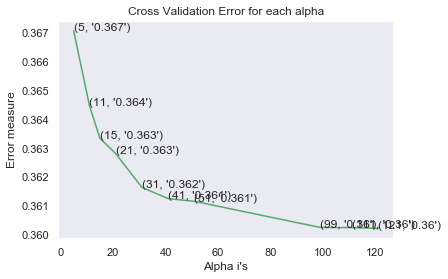

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                           leaf_size=30,
                                                           metric='minkowski',
                                                           metric_params=None,
                                                           n_jobs=None,
                                                           n_neighbors=121, p=2,
                                                           weights='uniform'),
                       cv='warn', method='sigmoid')

In [555]:

alpha = [5, 11, 15, 21, 31, 41, 51, 99,111,121]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_bow, y_train)
    sig_clf_probs = sig_clf.predict_proba(x_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)

In [556]:
predict_y = sig_clf.predict_proba(x_train_bow)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_cv_bow)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_bow)
#print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best alpha =  121 The train log loss is: 0.35642527187290246
For values of best alpha =  121 The cross validation log loss is: 0.3602171886090073


Log loss : 0.3602171886090073
Number of mis-classified points : 0.12299611783512217
-------------------- Confusion matrix --------------------


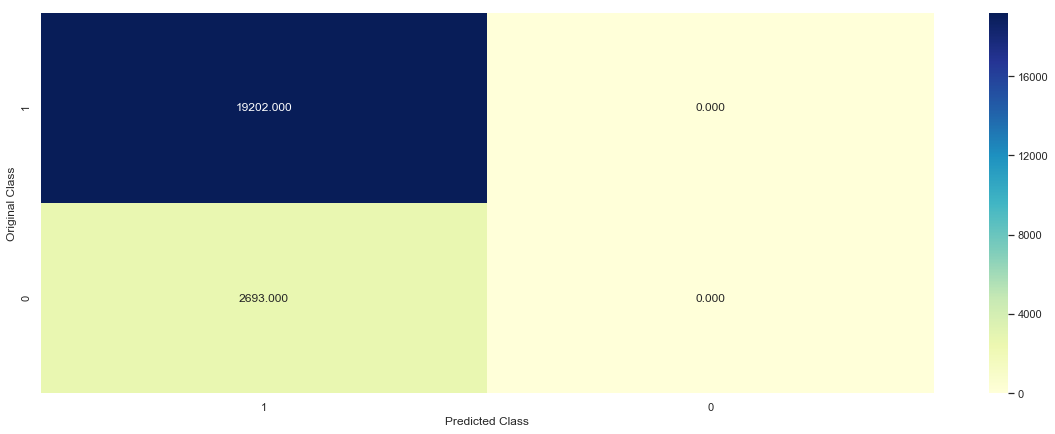

-------------------- Precision matrix (Columm Sum=1) --------------------


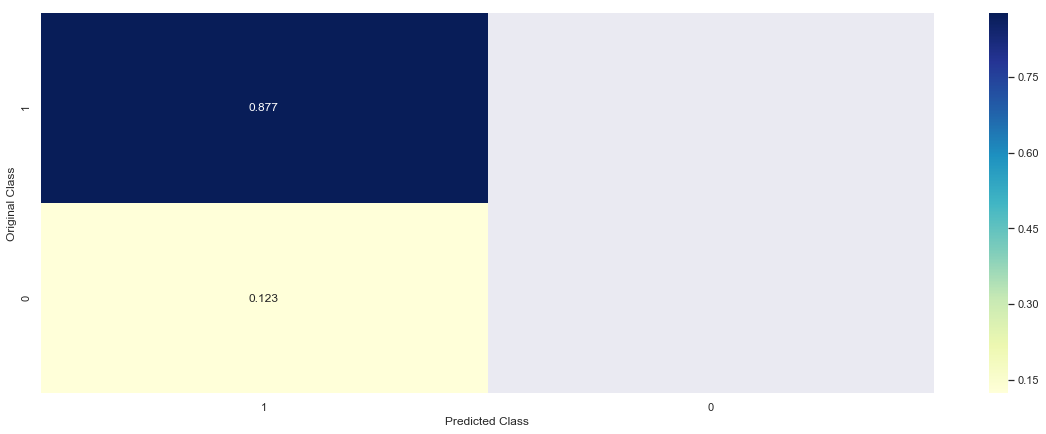

-------------------- Recall matrix (Row sum=1) --------------------


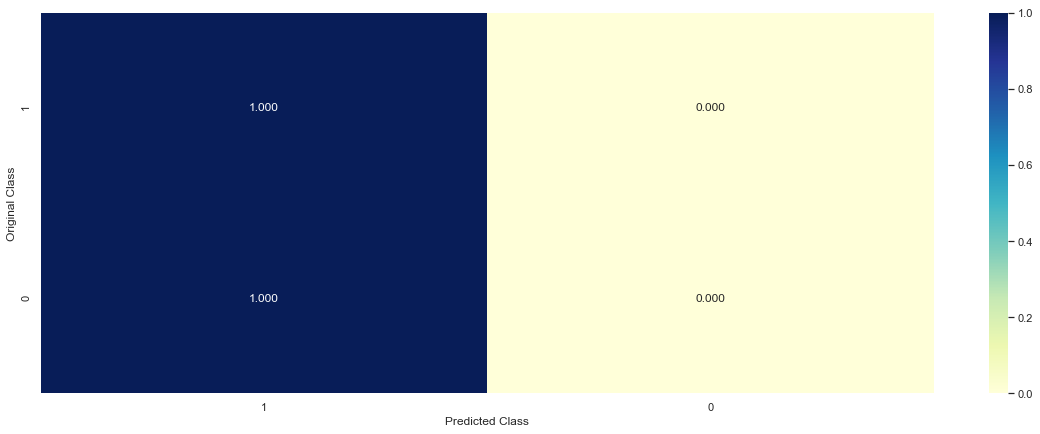

In [611]:
clf = KNeighborsClassifier(n_neighbors=121)
predict_and_plot_confusion_matrix(x_train_bow, y_train, x_cv_bow, y_cv, clf)

In [612]:
predictions = clf.predict(x_test_bow)
print(predictions)
new_series = pd.Series(predictions)
new_series.value_counts()

[0 0 0 ... 0 0 0]


0    48707
dtype: int64

In [613]:
predictions_knn = pd.DataFrame(new_series, columns=['IsBadBuy'])
predictions_knn.to_csv("predictions_knn.csv", index=False)

Notes:

most of the error occure in false negative cell in which original is 0 but predicted is 1.

of total available point 12.3% of point is misclassified using knn classifier.

after number of iteration, we found the tuned value of k=121 with cross validation log loss of: 0.365, for loss = log_loss at which minimum loss occure.

true positive is desirable condition which have high value while false negative value is very less again support our model accuracy.

## Naive base

for alpha = 1e-05
Log Loss : 0.3651929991631001
for alpha = 0.0001
Log Loss : 0.3651923929310967
for alpha = 0.001
Log Loss : 0.36518661928419344
for alpha = 0.1
Log Loss : 0.36501906515357485
for alpha = 1
Log Loss : 0.3654812110901443
for alpha = 10
Log Loss : 0.37014654475195896
for alpha = 100
Log Loss : 0.37285660568029316
for alpha = 1000
Log Loss : 0.3728523457566167


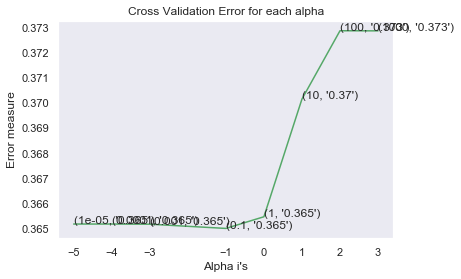

For values of best alpha =  0.1 The train log loss is: 0.3582251911752722
For values of best alpha =  0.1 The cross validation log loss is: 0.36501906515357485


In [558]:
from sklearn.calibration import CalibratedClassifierCV
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(x_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_bow, y_train)
    sig_clf_probs = sig_clf.predict_proba(x_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)


predict_y = sig_clf.predict_proba(x_train_bow)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_cv_bow)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_bow)
#print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log Loss : 0.36501906515357485
Number of missclassified point : 0.12299611783512217
-------------------- Confusion matrix --------------------


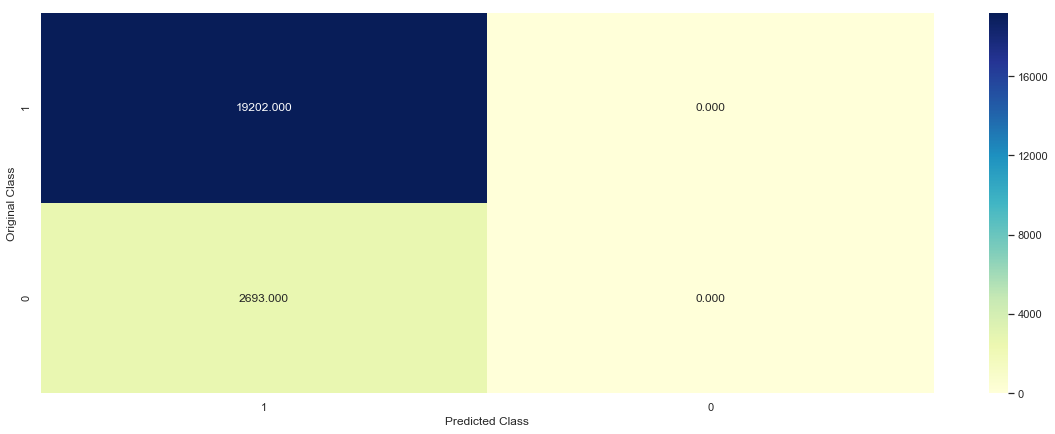

-------------------- Precision matrix (Columm Sum=1) --------------------


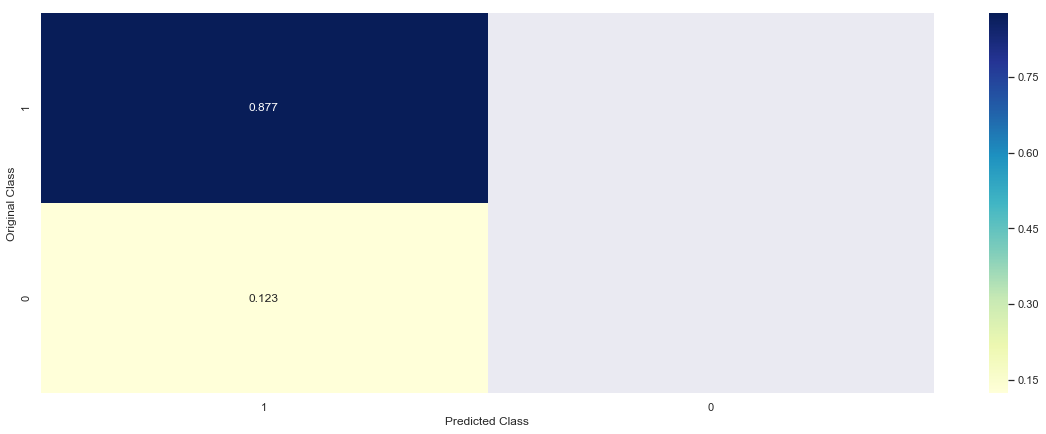

-------------------- Recall matrix (Row sum=1) --------------------


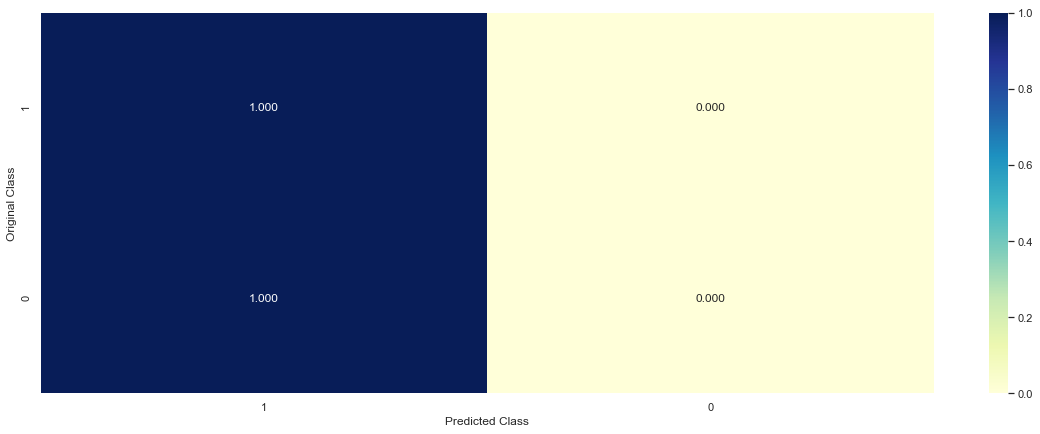

In [608]:

clf = MultinomialNB(alpha=0.1)
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)
sig_clf_probs = sig_clf.predict_proba(x_cv_bow)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_cv, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(x_cv_bow)- y_cv))/y_cv.shape[0])
plot_confusion_matrix(y_cv, sig_clf.predict(x_cv_bow.toarray()))

In [609]:
predictions = clf.predict(x_test_bow)
print(predictions)
new_series = pd.Series(predictions)
new_series.value_counts()

[0 1 0 ... 0 0 0]


0    44279
1     4428
dtype: int64

In [610]:
predictions_Naive = pd.DataFrame(new_series, columns=['IsBadBuy'])
predictions_Naive.to_csv("predictions_Naive.csv", index=False)

Notes:

most of the error occure in false negative cell in which original is 0 but predicted is 1.

of total available point 12.3% of point is misclassified using Naive base classifier.

after number of iteration, we found the tuned value of alpha =  0.1 with cross validation log loss of: 0.365, for loss = log_loss at which minimum loss occure.

true positive is desirable condition which have high value while false negative value is very less again support our model accuracy.

## Logistic Regression

for alpha = 1e-06
Log Loss : 0.3676314401758066
for alpha = 1e-05
Log Loss : 0.36251254483515316
for alpha = 0.0001
Log Loss : 0.35866349623727756
for alpha = 0.001
Log Loss : 0.35855575022518626
for alpha = 0.01
Log Loss : 0.3626059779016653
for alpha = 0.1
Log Loss : 0.3667125409318471
for alpha = 1
Log Loss : 0.368163326987055
for alpha = 10
Log Loss : 0.3683816160086673
for alpha = 100
Log Loss : 0.36840622819475716


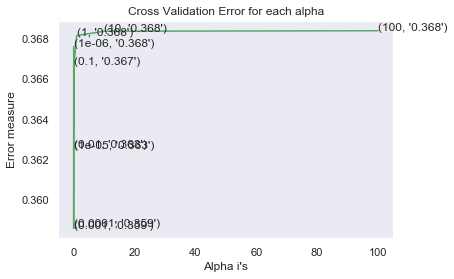

For values of best alpha =  0.001 The train log loss is: 0.3544213181694525
For values of best alpha =  0.001 The cross validation log loss is: 0.35855575022518626


In [560]:

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(x_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_bow, y_train)
    sig_clf_probs = sig_clf.predict_proba(x_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)

predict_y = sig_clf.predict_proba(x_train_bow)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_cv_bow)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_bow)
#print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.35855575022518626
Number of mis-classified points : 0.12299611783512217
-------------------- Confusion matrix --------------------


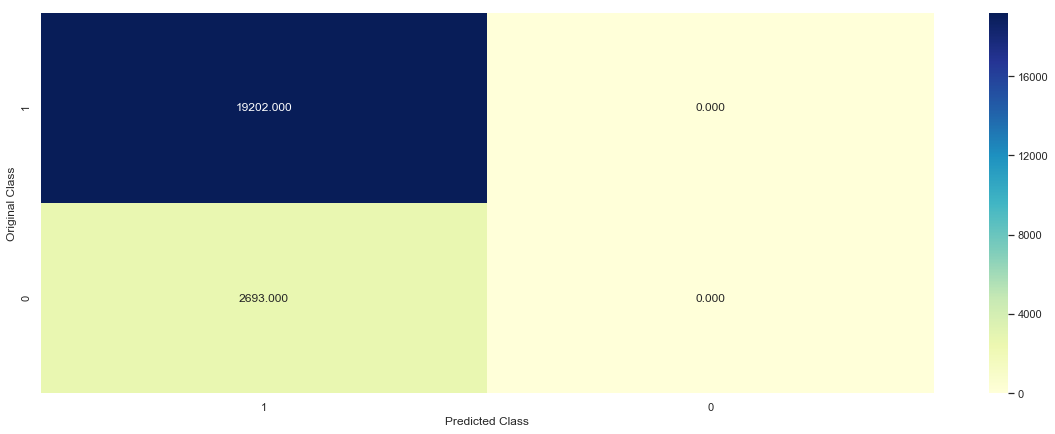

-------------------- Precision matrix (Columm Sum=1) --------------------


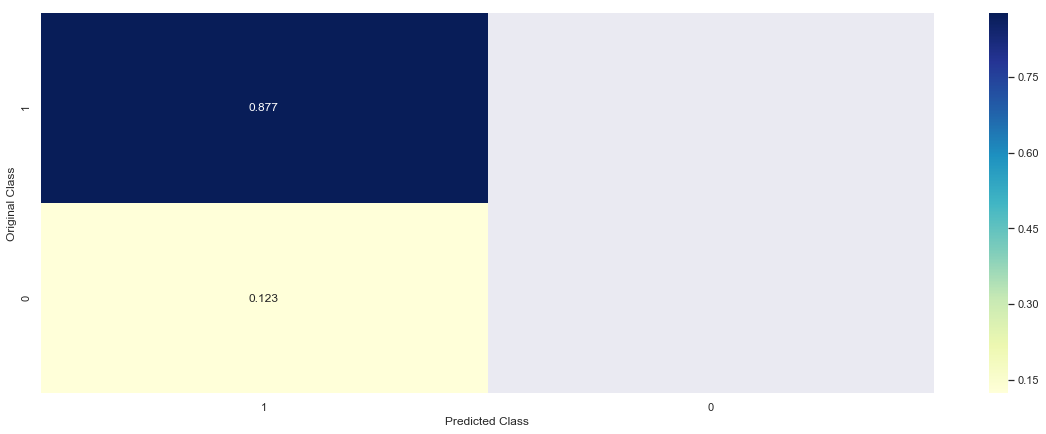

-------------------- Recall matrix (Row sum=1) --------------------


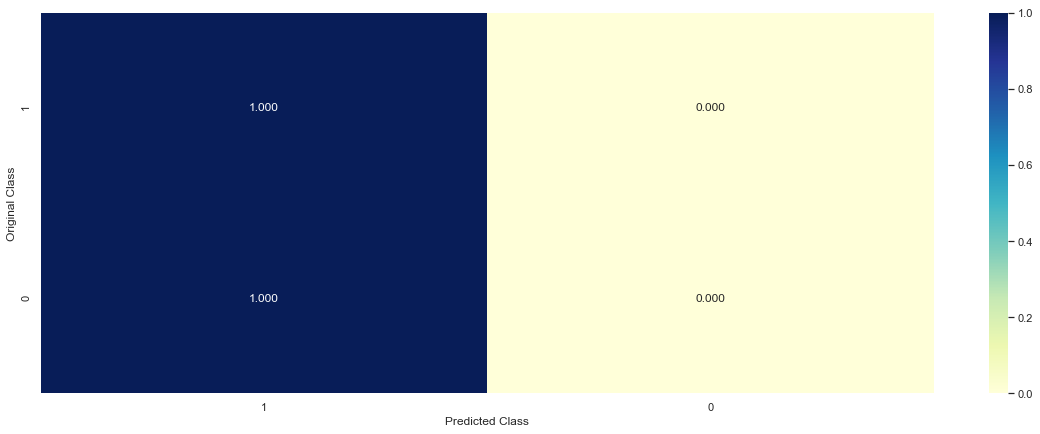

In [605]:
clf = SGDClassifier(class_weight='balanced', alpha=0.001, penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(x_train_bow, y_train, x_cv_bow, y_cv, clf)

In [606]:
predictions = clf.predict(x_test_bow)
print(predictions)
new_series = pd.Series(predictions)
new_series.value_counts()

[1 1 1 ... 0 0 0]


1    34944
0    13763
dtype: int64

In [607]:
predictions_LOGISTIC = pd.DataFrame(new_series, columns=['IsBadBuy'])
predictions_LOGISTIC.to_csv("predictions_LOGISTIC.csv", index=False)

Notes:

most of the error occure in false negative cell in which original is 0 but predicted is 1.

of total available point 12.3% of point is misclassified using logistic regression classifier.

after number of iteration, we found the tuned value of alpha =  0.001,  for loss = log at which minimum loss occure.

true positive is desirable condition which have high value while false negative value is very less again support our model accuracy.

## Linear Support Vector Machines

for C = 1e-05
Log Loss : 0.3622920360344007
for C = 0.0001
Log Loss : 0.35913680033100404
for C = 0.001
Log Loss : 0.3595764090979283
for C = 0.01
Log Loss : 0.3638379123403508
for C = 0.1
Log Loss : 0.3682899935179967
for C = 1
Log Loss : 0.3684071588943381
for C = 10
Log Loss : 0.3684099823356231
for C = 100
Log Loss : 0.3684103267978749


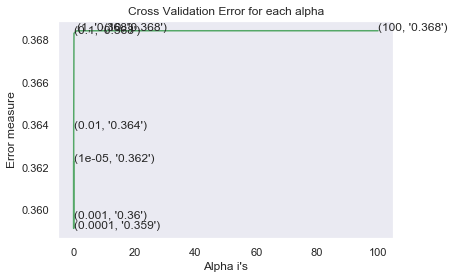

For values of best alpha =  0.0001 The train log loss is: 0.35204372222323355
For values of best alpha =  0.0001 The cross validation log loss is: 0.35913680033100404


In [562]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(x_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_bow, y_train)
    sig_clf_probs = sig_clf.predict_proba(x_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)

predict_y = sig_clf.predict_proba(x_train_bow)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_cv_bow)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_bow)
#print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.35913680033100404
Number of mis-classified points : 0.12299611783512217
-------------------- Confusion matrix --------------------


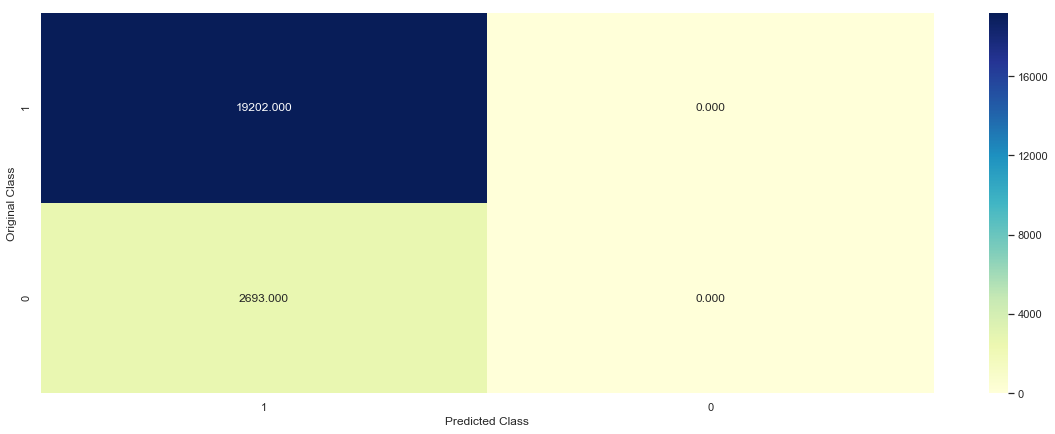

-------------------- Precision matrix (Columm Sum=1) --------------------


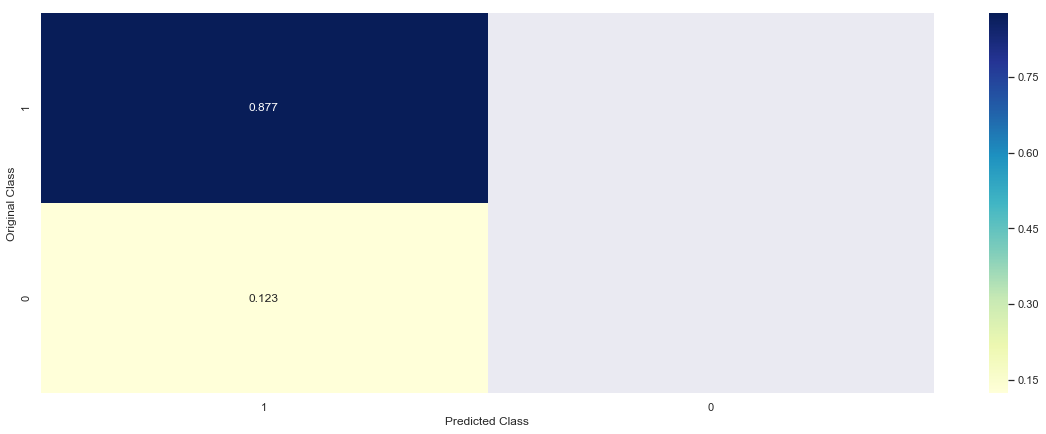

-------------------- Recall matrix (Row sum=1) --------------------


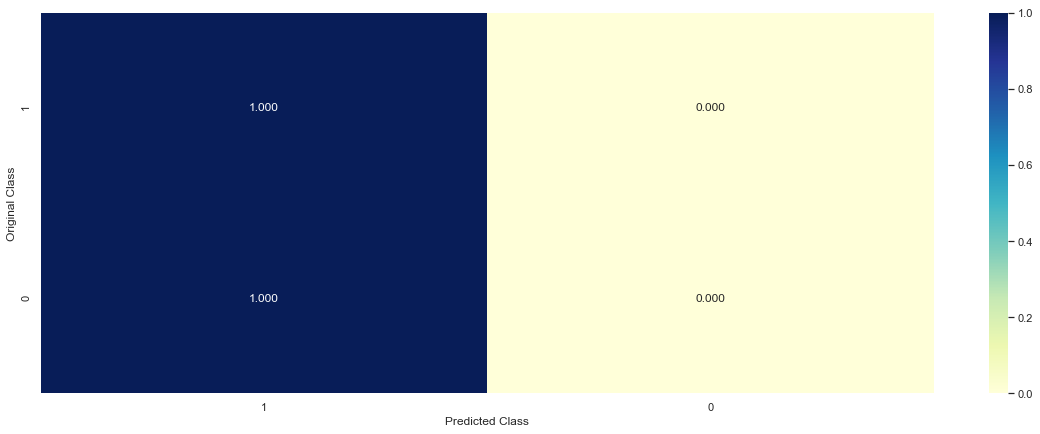

In [602]:
# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=0.0001, penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(x_train_bow, y_train,x_cv_bow,y_cv, clf)

In [603]:
predictions = clf.predict(x_test_bow)
print(predictions)
new_series = pd.Series(predictions)
new_series.value_counts()

[0 1 0 ... 0 0 0]


0    37179
1    11528
dtype: int64

In [604]:
predictions_SVM = pd.DataFrame(new_series, columns=['IsBadBuy'])
predictions_SVM.to_csv("predictions_SVM.csv", index=False)

Notes:

most of the error occure in false negative cell in which original is 0 but predicted is 1.

of total available point 12.3% of point is misclassified using support vector machine classifier.

after number of iteration, we found the tuned value of alpha=0.0001,  for loss = hinge.

true positive is desirable condition which have high value while false negative value is very less again support our model accuracy.

## Random Forest Classifie

In [564]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(x_train_bow, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(x_train_bow, y_train)
        sig_clf_probs = sig_clf.predict_proba(x_cv_bow)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)

predict_y = sig_clf.predict_proba(x_train_bow)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_cv_bow)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_bow)
#print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 0.36521456128006996
for n_estimators = 100 and max depth =  10
Log Loss : 0.3638449773032039
for n_estimators = 200 and max depth =  5
Log Loss : 0.36538038229699166
for n_estimators = 200 and max depth =  10
Log Loss : 0.3638092230242292
for n_estimators = 500 and max depth =  5
Log Loss : 0.365185416489371
for n_estimators = 500 and max depth =  10
Log Loss : 0.3636131280183961
for n_estimators = 1000 and max depth =  5
Log Loss : 0.3650757283865537
for n_estimators = 1000 and max depth =  10
Log Loss : 0.3635144143084634
for n_estimators = 2000 and max depth =  5
Log Loss : 0.36509527872669467
for n_estimators = 2000 and max depth =  10
Log Loss : 0.3635069086640479
For values of best estimator =  2000 The train log loss is: 0.3509418392981829
For values of best estimator =  2000 The cross validation log loss is: 0.3635069086648878


Log loss : 0.3635069086657385
Number of mis-classified points : 0.12345284311486641
-------------------- Confusion matrix --------------------


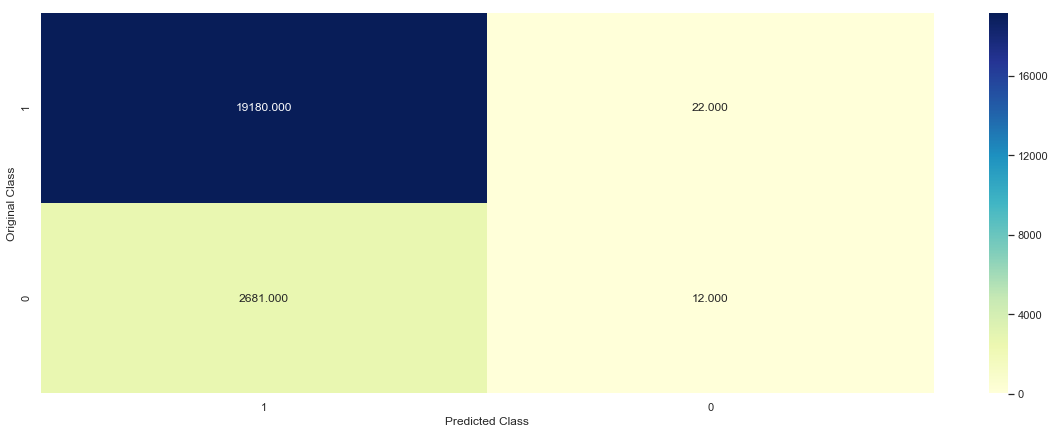

-------------------- Precision matrix (Columm Sum=1) --------------------


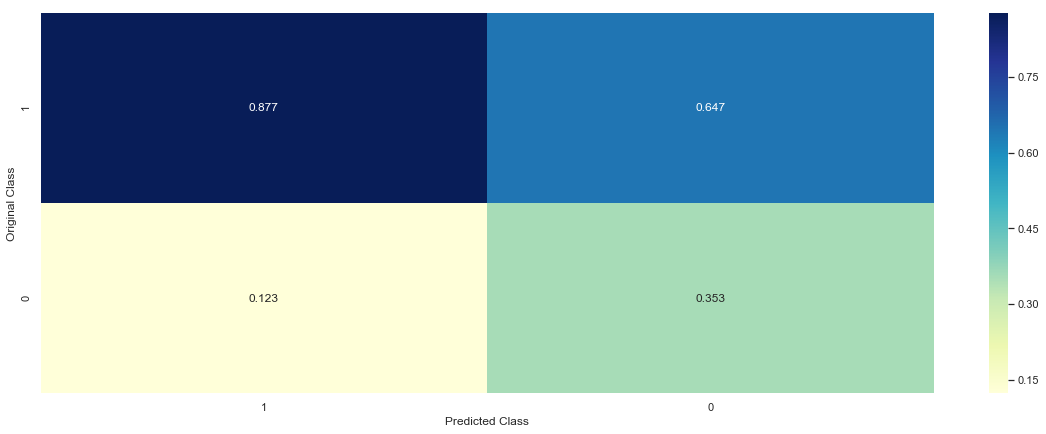

-------------------- Recall matrix (Row sum=1) --------------------


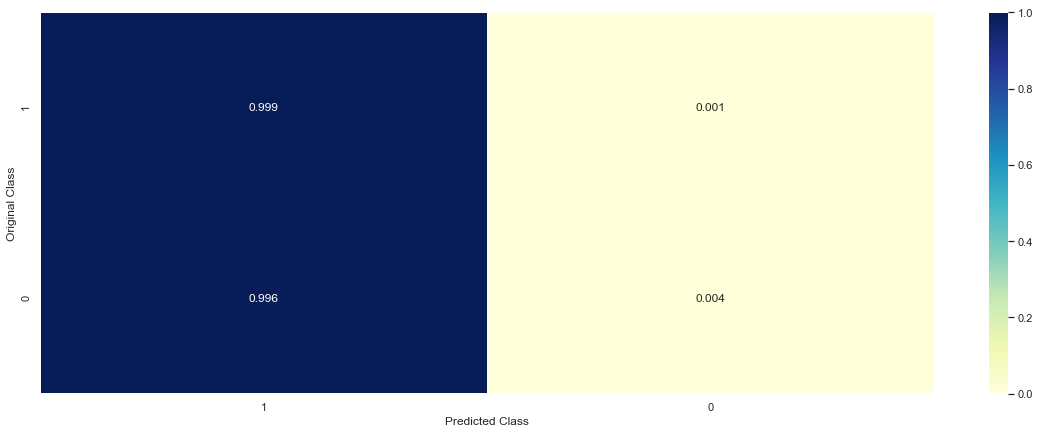

In [599]:
clf = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(x_train_bow, y_train,x_cv_bow,y_cv, clf)

In [600]:
predictions = clf.predict(x_test_bow)
print(predictions)
new_series = pd.Series(predictions)
new_series.value_counts()

[0 0 0 ... 0 0 0]


0    48707
dtype: int64

In [601]:
predictions_RF = pd.DataFrame(new_series, columns=['IsBadBuy'])
predictions_RF.to_csv("predictions_RF.csv", index=False)

Notes: 
    
    most of the error occure in false negative cell in which original is 0 but predicted is 1.
    
    of total available point 12.3% of point is misclassified using Random forest classifier.
    
    after five set of iteration, we found the tuned value of n_estimators=2000,  max_depth=10 for criterion='gini' loss.
    
    true positive is desirable condition which have high value while false negative value is very less again support our model accuracy.

## Stack the models

In [571]:
clf2 = KNeighborsClassifier(n_neighbors=121)
clf2.fit(x_train_bow, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")
sig_clf2.fit(x_train_bow, y_train)

clf3 = MultinomialNB(alpha=0.1)
clf3.fit(x_train_bow, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")
sig_clf3.fit(x_train_bow, y_train)

clf4 = SGDClassifier(class_weight='balanced', alpha=0.001, penalty='l2', loss='log', random_state=0)
clf4.fit(x_train_bow, y_train)
sig_clf4 = CalibratedClassifierCV(clf4, method="sigmoid")
sig_clf4.fit(x_train_bow, y_train)

clf5 = SGDClassifier(class_weight='balanced', alpha=0.0001, penalty='l2', loss='hinge', random_state=0)
clf5.fit(x_train_bow, y_train)
sig_clf5 = CalibratedClassifierCV(clf5, method="sigmoid")
sig_clf5.fit(x_train_bow, y_train)

clf6 = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=10, random_state=0, n_jobs=-1)
clf6.fit(x_train_bow, y_train)
sig_clf6 = CalibratedClassifierCV(clf6, method="sigmoid")
sig_clf6.fit(x_train_bow, y_train)


print("KNN :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(x_cv_bow))))

print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf4.predict_proba(x_cv_bow))))

print("Support vector machines : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf5.predict_proba(x_cv_bow))))

print("Naive Bayes : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf3.predict_proba(x_cv_bow))))

print("Random Forest :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf6.predict_proba(x_cv_bow))))

print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf2, sig_clf3, sig_clf4,sig_clf5,sig_clf6], meta_classifier=lr, use_probas=True)
    sclf.fit(x_train_bow, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(x_cv_bow))))
    log_error =log_loss(y_cv, sclf.predict_proba(x_cv_bow))
    if best_alpha > log_error:
        best_alpha = log_error

KNN :  Log Loss: 0.36
Logistic Regression :  Log Loss: 0.36
Support vector machines : Log Loss: 0.36
Naive Bayes : Log Loss: 0.37
Random Forest :  Log Loss: 0.36
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.383
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.368
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.361
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.361
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.368
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.373


the minimum log loss occure at alpha value of 0.01 and 0.1

In [573]:
lr = LogisticRegression(C=0.01)
sclf = StackingClassifier(classifiers=[sig_clf2, sig_clf3, sig_clf4,sig_clf5,sig_clf6], meta_classifier=lr, use_probas=True)
sclf.fit(x_train_bow, y_train)


'log_error = log_loss(y_train, sclf.predict_proba(x_train_bow))\nprint("Log loss (train) on the stacking classifier :",log_error)\n\nlog_error = log_loss(y_cv, sclf.predict_proba(x_cv_bow))\nprint("Log loss (CV) on the stacking classifier :",log_error)\n\n#log_error = log_loss(y_test, sclf.predict_proba(x_test_bow))\n#print("Log loss (test) on the stacking classifier :",log_error)\n\nprint("Number of missclassified point :", np.count_nonzero((sclf.predict(x_test_bow)- y_test))/y_test.shape[0])\nplot_confusion_matrix(y_test=y_test, predict_y=sclf.predict(x_test_bow))'

Here im using logistic regression for all stacking classifier

In [597]:
predictions = sclf.predict(x_test_bow)
print(predictions)
new_series = pd.Series(predictions)
new_series.value_counts()

[0 0 0 ... 0 0 0]


0    48698
1        9
dtype: int64

In [598]:
predictions_stack = pd.DataFrame(new_series, columns=['IsBadBuy'])
predictions_stack.to_csv("predictions_stack.csv", index=False)

## Conclusion

Naive base , Logistic regreession and SVM shows better result for above problem.

KNN, Randome Forest, and Stacking Logistic regression are bias toward one class of buyer hence they have bias problem.

Random forest shows very good result on training data but one test data is's shows bias problem.